In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

In [2]:
#uploading the dataset
df = pd.read_csv('ks-projects-201801.csv')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df['ID'].duplicated().sum()
#NO DUPLICATES

0

In [5]:
df['state'].value_counts() #we will focus on failed and successful projects
df = df[(df['state'] == 'successful') | (df['state'] == 'failed')]
df['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

Text(0.5, 1.0, 'distibution of the projects state')

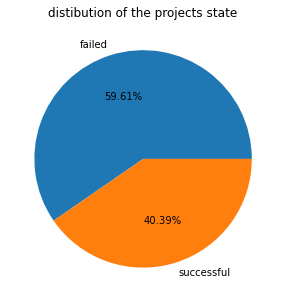

In [6]:
plt.figure(figsize=(8,5))
plt.pie(x = df['state'].value_counts(),
        labels = df['state'].value_counts().index,
        autopct='%1.2f%%')

plt.title('distibution of the projects state')

# Data Cleaning

In [7]:
df.shape, pd.isnull(df).sum()

((331675, 15),
 ID                    0
 name                  3
 category              0
 main_category         0
 currency              0
 deadline              0
 goal                  0
 launched              0
 pledged               0
 state                 0
 backers               0
 country               0
 usd pledged         210
 usd_pledged_real      0
 usd_goal_real         0
 dtype: int64)

we can see that there are 213 missing balues in total, out of 331675 rows, so there is no problem to just drop the missing values

In [8]:
df = df.dropna(axis=0) #dropping missing values
pd.isnull(df).sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

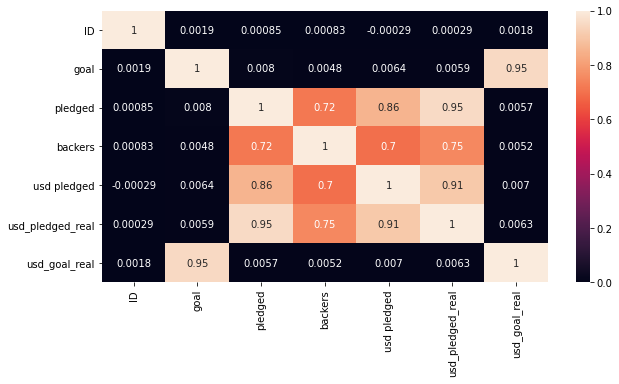

In [9]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap='rocket', annot=True)

we can see that usd_pledged_real is highly corolated to 'pledged' and 'usd pledged', which makes sense because they all reffer to the money pledged, converted to USD.
we can say the same about 'goal' and 'usd_goal_real'.
we will use USD for the entire project, so we'll use just 'use_pledged_real' and 'usd_goal_real' and drop the rest duplicates.
further more, we'll drop the unecessary columns: 'ID','category' (the model will be used on main category), 'currency' which is a proxy of the 'Country' column.

In [10]:
#Droping duplicated data data, columns: ID,category (the model will be used on main category), currency, usd_pledged, goal, pledged.
#also, lets rename 'used_pledged_real' and 'usd_goal_real' to 'pledged' and 'goal'.
main_df = df.drop(['ID','category', 'currency','usd pledged','goal','pledged'], axis=1)
main_df = main_df.rename({'usd_goal_real': 'goal', 'usd_pledged_real': 'pledged'}, axis=1)
main_df.head()

,name,main_category,deadline,launched,state,backers,country,pledged,goal
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Where is Hank?,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
5,Monarch Espresso Bar,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00


In [11]:
#lets add 'binary_state'. later we will drop the state, it's just convinient for the EDA
main_df['binary_state'] = main_df['state'].map({'successful':1, 'failed':0})
main_df

,name,main_category,deadline,launched,state,backers,country,pledged,goal,binary_state
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,0
2,Where is Hank?,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,0
5,Monarch Espresso Bar,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00,1
...,...,...,...,...,...,...,...,...,...,...
378654,"Homemade fresh dog food, Cleveland OH",Food,2017-04-19,2017-03-20 22:08:22,failed,4,US,154.0,6500.00,0
378657,The Tribe,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.0,1500.00,0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.0,15000.00,0
378659,BioDefense Education Kit,Technology,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.0,15000.00,0


# EDA

### main_category

In [12]:
#lets review the main_category column
main_df['main_category'].describe(), main_df['main_category'].value_counts()

(count           331462
 unique              15
 top       Film & Video
 freq             56503
 Name: main_category, dtype: object,
 Film & Video    56503
 Music           45801
 Publishing      35413
 Games           28520
 Technology      27046
 Art             25640
 Design          25363
 Food            22054
 Fashion         19774
 Theater         10242
 Comics           9878
 Photography      9689
 Crafts           7818
 Journalism       4148
 Dance            3573
 Name: main_category, dtype: int64)

We can tell that there are decent amount of projects frim each main category, we wont drop any of them.

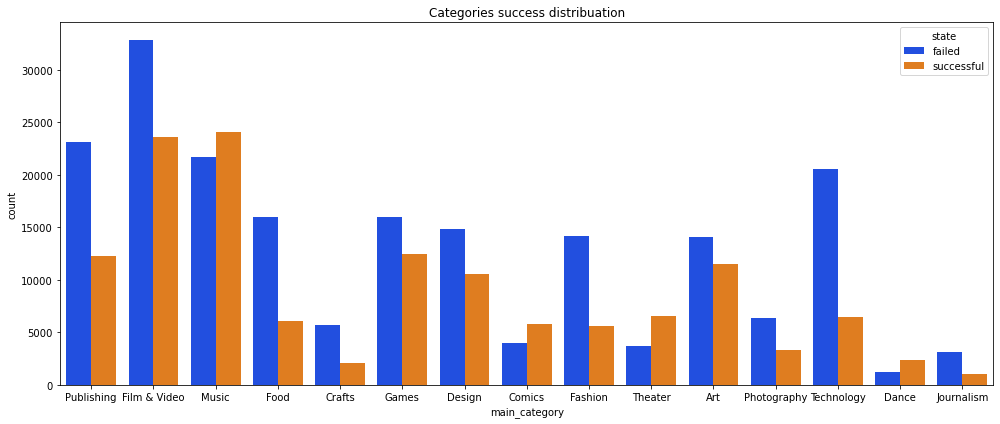

In [13]:
plt.figure(figsize=(14,6))
sns.countplot(x='main_category', hue='state', data=main_df, palette='bright')
plt.title("Categories success distribuation")
plt.tight_layout()

In [14]:
grouped_category = main_df.groupby('main_category').agg({'binary_state': 'sum', 'state': 'count'})
grouped_category['succ_percent'] = grouped_category['binary_state']/grouped_category['state']

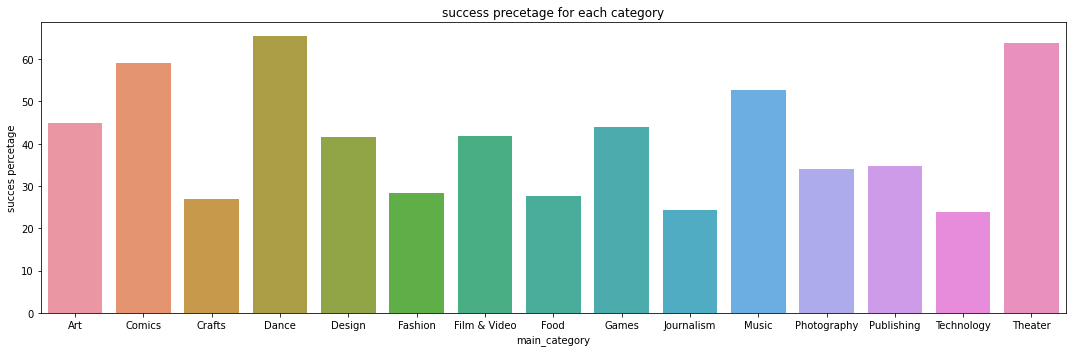

In [15]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x= grouped_category.index, y=grouped_category['succ_percent']*100, data = grouped_category)
plt.title("success precetage for each category")
plt.ylabel("succes percetage")
plt.tight_layout()

In [16]:
category_succ_dict = grouped_category['succ_percent'].to_dict()
category_succ_dict

{'Art': 0.44890795631825275,
 'Comics': 0.5914152662482284,
 'Crafts': 0.2705295471987721,
 'Dance': 0.6543520850825637,
 'Design': 0.41592082955486337,
 'Fashion': 0.28284616162637805,
 'Film & Video': 0.41788931561156045,
 'Food': 0.2759136664550648,
 'Games': 0.4389200561009818,
 'Journalism': 0.24397299903567984,
 'Music': 0.526298552433353,
 'Photography': 0.3411084735266797,
 'Publishing': 0.3473300765255697,
 'Technology': 0.23785402647341566,
 'Theater': 0.6379613356766256}

we can see that there are sagnificant differences in the success percentage between categories.
there for lets create dummies for those categories later, in the preprocessing.

In [18]:
#Lets create a 'succ_rate' column which contains the success rate of each category. 
#this may be a better value for the model then the category itself
main_df['succ_category'] = main_df['main_category'].map(category_succ_dict)
main_df.head()

,name,main_category,deadline,launched,state,backers,country,pledged,goal,binary_state,succ_category
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,0,0.347330
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,0,0.417889
2,Where is Hank?,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,0,0.417889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,0,0.526299
5,Monarch Espresso Bar,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00,1,0.275914


### launched & deadline 

In [19]:
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [20]:
#Transformin the 'launched' & 'deadline' columns into date objects, in order to calculate the headstart's length later.
main_df[['deadline', 'launched']] = main_df[['deadline', 'launched']].apply(pd.to_datetime, errors='coerce')
main_df[['deadline', 'launched']].dtypes

deadline    datetime64[ns]
launched    datetime64[ns]
dtype: object

In [21]:
#Creating 'project_len' column, reffering to the project's length scaled in days.
main_df['project_len'] = main_df['deadline'] - main_df['launched']
main_df['project_len'] = main_df['project_len']

In [22]:
#extracting the project length in days.
main_df['project_len'] = main_df['project_len'].astype('timedelta64[D]')
main_df['project_len'] = main_df['project_len'].apply(lambda x: int(x)+1)

In [23]:
main_df['project_len'].describe()

count    331462.000000
mean         33.955938
std          12.714064
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: project_len, dtype: float64

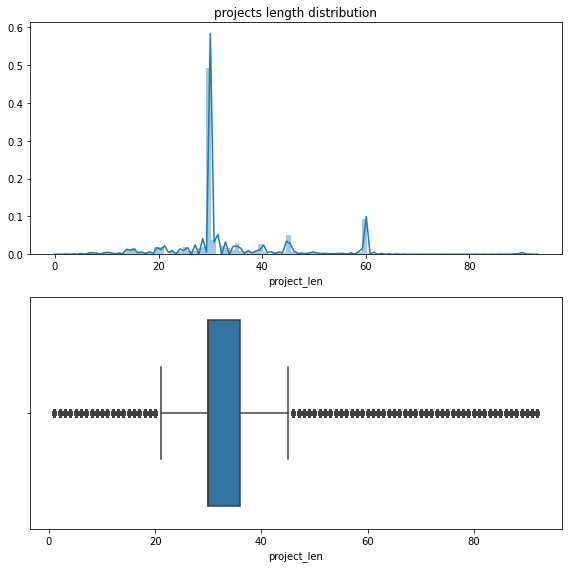

In [24]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (8,8))
sns.distplot(main_df['project_len'], ax=ax[0], bins=100)
sns.boxplot(main_df['project_len'], ax=ax[1])
ax[0].set_title('projects length distribution')
plt.tight_layout()

In [25]:
# extracting the month out of the launched and daeadline date to see if there is a connection 
#between the final state and the month launched

main_df['launched_month'] = pd.DatetimeIndex(main_df['launched']).month
main_df['deadline_month'] = pd.DatetimeIndex(main_df['deadline']).month
main_df['launched_month'] = main_df['launched_month'].map(month_dict)
main_df['deadline_month'] = main_df['deadline_month'].map(month_dict)
main_df[['launched_month', 'deadline_month']]

,launched_month,deadline_month
0,Aug,Oct
1,Sep,Nov
2,Jan,Feb
3,Mar,Apr
5,Feb,Apr
...,...,...
378654,Mar,Apr
378657,Jun,Jul
378658,Jul,Aug
378659,Jan,Feb


Text(0.5, 1.0, 'success distribution of each launched month')

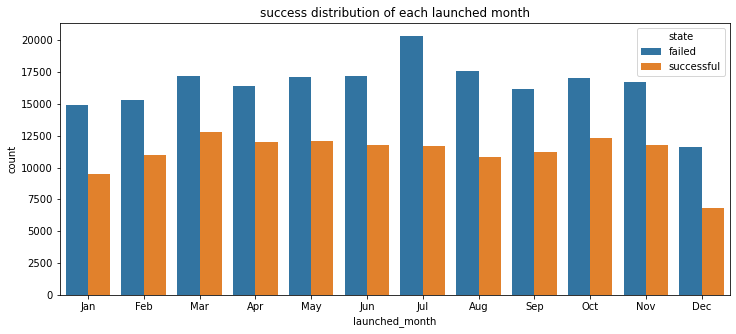

In [27]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='launched_month', hue='state', data=main_df[['launched_month', 'state']],
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('success distribution of each launched month')

From the plot above, we can tell that the successful projects have around the same percentage in each launched month.
To be more precised lets check the succesful percentage for each month

Text(0.5, 1.0, 'success rate of each launched month')

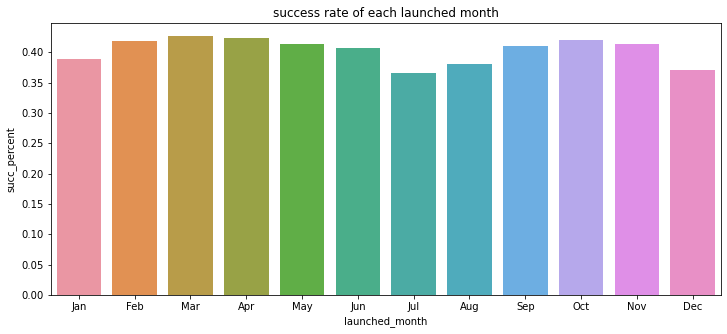

In [28]:
grouped_launch_month = main_df.groupby('launched_month').agg({'binary_state': 'sum', 'state': 'count'})
grouped_launch_month['succ_percent'] = grouped_launch_month['binary_state']/grouped_launch_month['state']
fig = plt.figure(figsize=(12,5))
sns.barplot(x= grouped_launch_month.index, y='succ_percent', data = grouped_launch_month,
            order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('success rate of each launched month')

Text(0.5, 1.0, 'success distribution of each deadline month')

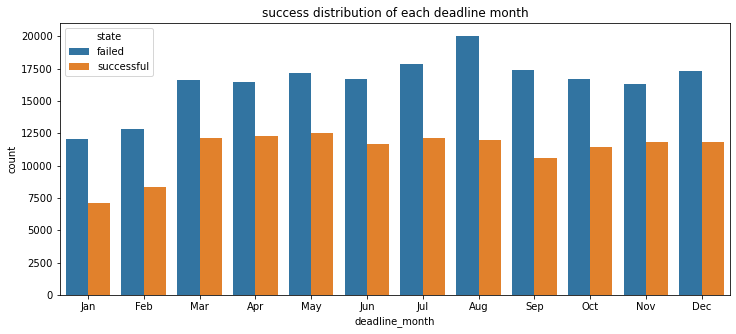

In [29]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='deadline_month', hue='state', data=main_df[['deadline_month', 'state']],
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('success distribution of each deadline month')

Text(0.5, 1.0, 'success rate of each deadline month')

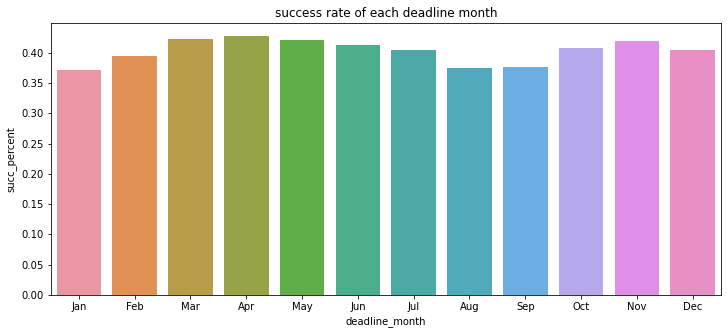

In [31]:
grouped_deadline_month = main_df.groupby('deadline_month').agg({'binary_state': 'sum', 'state': 'count'})
grouped_deadline_month['succ_percent'] = grouped_deadline_month['binary_state']/grouped_deadline_month['state']
fig = plt.figure(figsize=(12,5))
sns.barplot(x= grouped_deadline_month.index, y='succ_percent', data = grouped_deadline_month,
            order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('success rate of each deadline month')

From the plots above we can undestand that success percentage of projects is around 35%-45% for each launched month and deadline months. 
Therefor, they are unecessary features.
we'll just use the projects lengths.

In [32]:
data = main_df[(main_df['project_len']<=40) & (main_df['project_len']>=20)]
succ_rate = data['binary_state'].sum()/data.shape[0]
succ_rate

0.41777602458165514

In [33]:
data = main_df[~(main_df['project_len']<=40) & (main_df['project_len']>=20)]
succ_rate = data['binary_state'].sum()/data.shape[0]
succ_rate

0.3125886944181646

the isnt a dramatic dissimalrity between success rate of projects inside the 20-40 days length and those outside.
so we will keep all of project lengths.

In [34]:
main_df.drop(['launched', 'deadline'], axis=1, inplace=True)


### Backers 

In [35]:
main_df['backers'].describe()

count    331462.000000
mean        116.456315
std         965.732911
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64

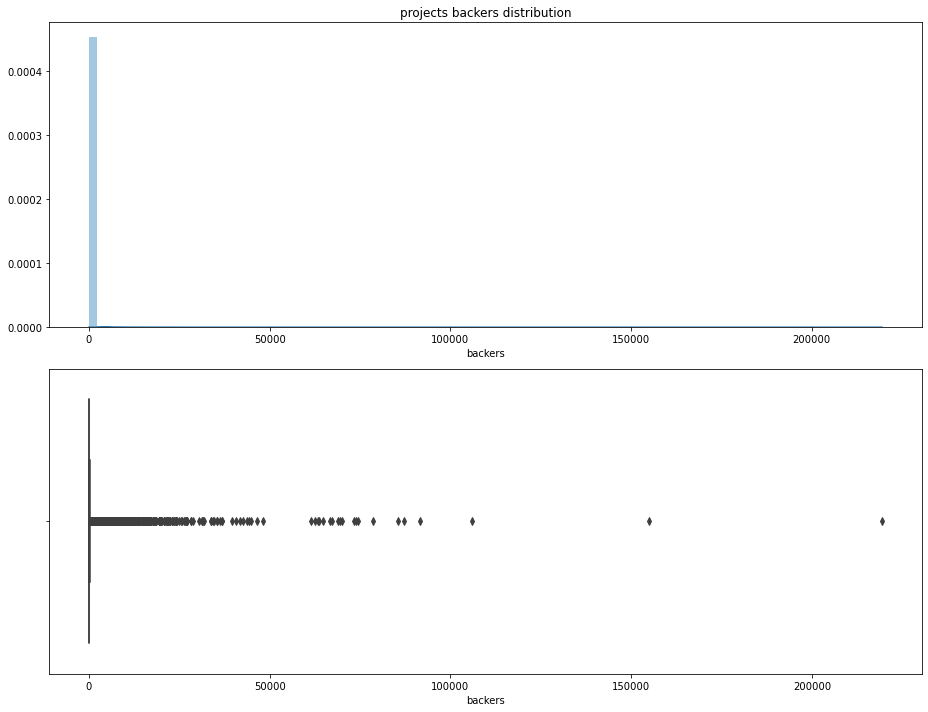

In [36]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (13,10))
sns.distplot(main_df['backers'], ax=ax[0], bins=100)
sns.boxplot(main_df['backers'], ax=ax[1])
ax[0].set_title('projects backers distribution')
plt.tight_layout()

We can see that the std is really high (975.37), and the max value (219382) is extremly higher than the mean (116.45)
Because of that we should try to cut of some outliers from the top.
Notice: we know that 59.61% are failed, so it's very reasonable that there are a lot of projects with 0 or little more backers.

3      13947
4      10502
5       8469
6       7028
7       6148
       ...  
326       44
349       41
343       41
344       41
345       41
Name: backers, Length: 350, dtype: int64

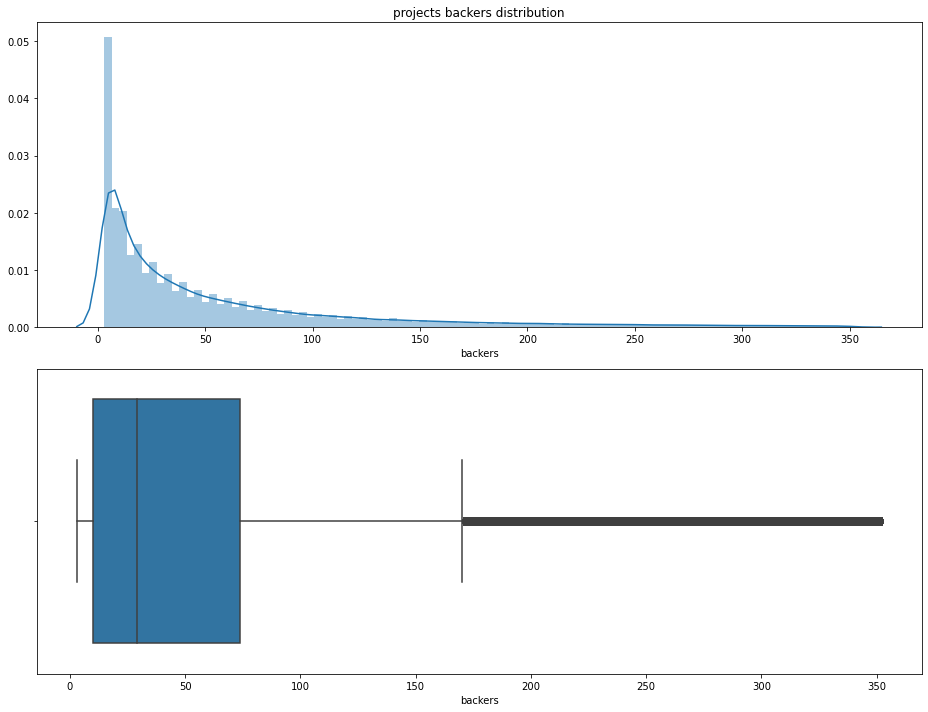

In [45]:
#first we'll cut 1% of each size
#no_outliers_backers =  main_df[main_df['backers'] < np.quantile(main_df['backers'],0.99)]['backers']
#secondly try to cut 2% of each size
no_outliers_backers =  main_df[(main_df['backers'] < np.quantile(main_df['backers'],0.98)) & 
                                     (main_df['backers'] > np.quantile(main_df['backers'],0.02))]['backers']

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (13,10))
sns.distplot(no_outliers_backers, ax=ax[0], bins=100)
sns.boxplot(no_outliers_backers, ax=ax[1])
ax[0].set_title('projects backers distribution')
plt.tight_layout()
no_outliers_backers.value_counts()

from these plots we can tell that beside 0 backers for probably failed projects, the number of backers are between 0-200, with a big skew to the left.
so to conclude lets drop these outliert

count    121505.000000
mean         98.123608
std          98.609416
min           2.000000
25%          30.000000
50%          62.000000
75%         128.000000
max         498.000000
Name: backers, dtype: float64

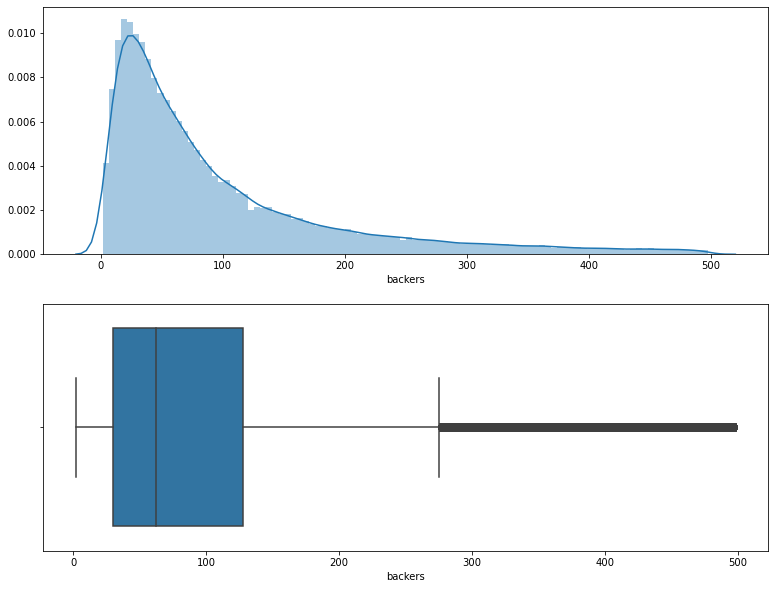

In [50]:
success_backers = main_df[main_df['state'] == 'successful']['backers']
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (13,10))
sns.distplot(success_backers, ax=ax[0], bins=100)
sns.boxplot(success_backers, ax=ax[1])
success_backers.describe()

count    129203.000000
mean         21.795206
std          41.568153
min           2.000000
25%           3.000000
50%           8.000000
75%          21.000000
max         498.000000
Name: backers, dtype: float64

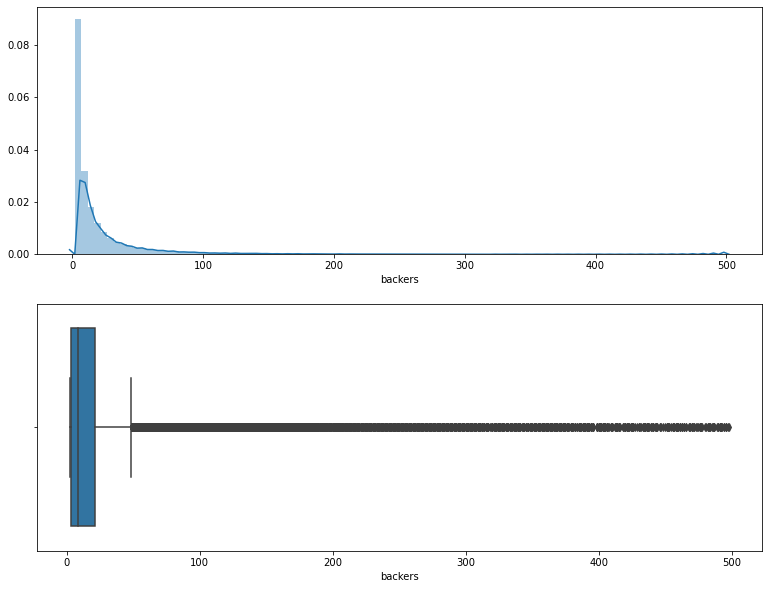

In [51]:
failed_backers = main_df[main_df['state'] == 'failed']['backers']
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (13,10))
sns.distplot(failed_backers, ax=ax[0], bins=100)
sns.boxplot(failed_backers, ax=ax[1])
failed_backers.describe()

from these plots we can tell that 'bakers' is a key factor to project's success. we can assume that prjects with low amount of backers probably heading to failure' while projects with a lot of backers will probably succeed.
so lets drop 2% of outliers from each ide of the backers distribution.

In [52]:
main_df = main_df[(main_df['backers'] < np.quantile(main_df['backers'],0.98)) & 
                                     (main_df['backers'] > np.quantile(main_df['backers'],0.02))]

### Pledged 

In [53]:
main_df['pledged'].describe()

count    225448.000000
mean       4977.331579
std       10908.636804
min           1.590000
25%         441.887500
50%        1775.815000
75%        5434.552500
max      687116.000000
Name: pledged, dtype: float64

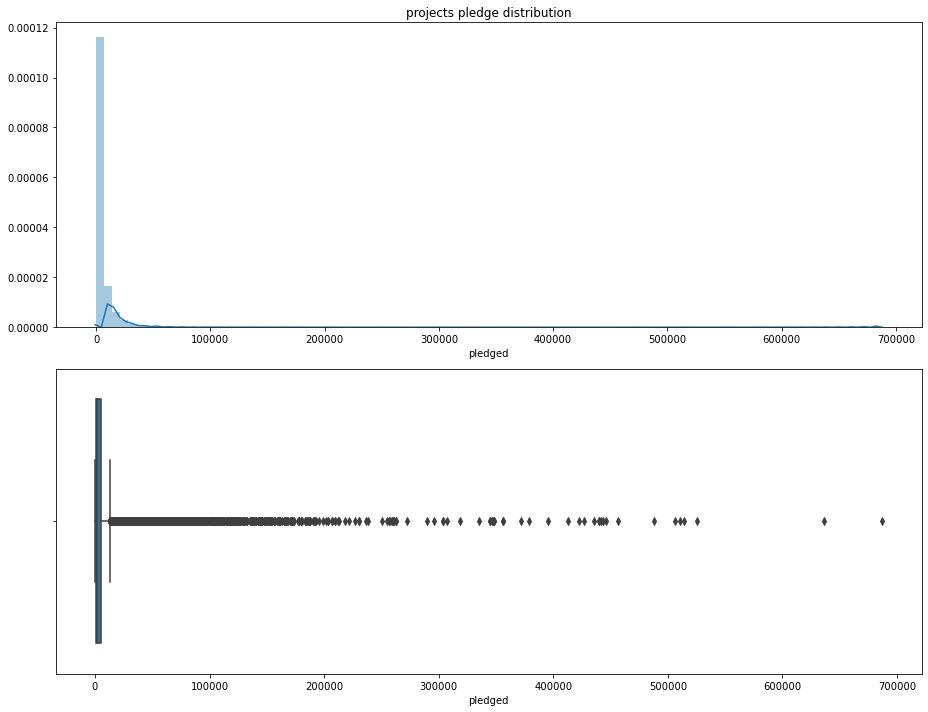

In [54]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (13,10))
sns.distplot(main_df['pledged'], ax=ax[0], bins=100)
sns.boxplot(main_df['pledged'], ax=ax[1])
ax[0].set_title('projects pledge distribution')
plt.tight_layout()

we can see that the pledge distribution is quite like the backers distribution, and even more extreme.
So let's try to do the same here as with the backers column, but also remove 2% from the left because projects with low value of pledged probably failed.

count    216376.000000
mean       4032.121323
std        5494.181114
min          30.010000
25%         476.000000
50%        1776.000000
75%        5236.000000
max       31035.000000
Name: pledged, dtype: float64

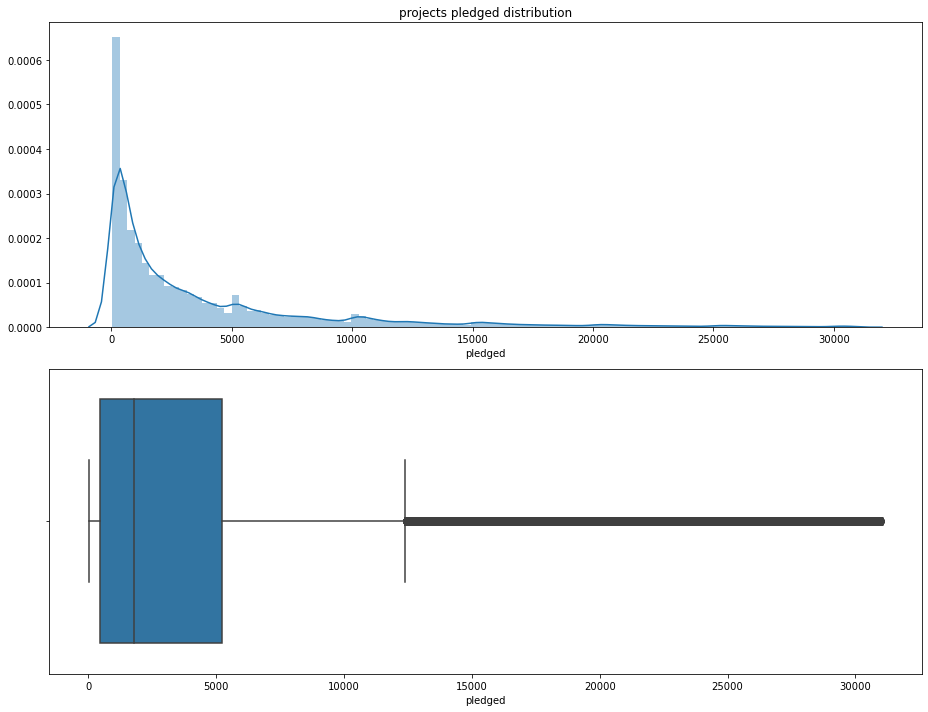

In [55]:
no_outliers_pledged = main_df[(main_df['pledged'] < np.quantile(main_df['pledged'],0.98)) & 
                                     (main_df['pledged'] > np.quantile(main_df['pledged'],0.02))]['pledged']

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (13,10))
sns.distplot(no_outliers_pledged, ax=ax[0], bins=100)
sns.boxplot(no_outliers_pledged, ax=ax[1])
ax[0].set_title('projects pledged distribution')
plt.tight_layout()
no_outliers_pledged.describe()

from these plots we can tell that money pledged for projects is in between 0-20000, and much skewed to the left.
lets drop these outliers

In [56]:
main_df = main_df[main_df['pledged'] < np.quantile(main_df['pledged'],0.98)]

### Country

In [57]:
main_df['country'].describe(), main_df['country'].value_counts()

(count     220939
 unique        22
 top           US
 freq      177436
 Name: country, dtype: object,
 US    177436
 GB     19582
 CA      7513
 AU      3950
 DE      1978
 FR      1524
 NL      1304
 IT      1206
 ES      1018
 SE       933
 NZ       819
 MX       758
 DK       592
 IE       398
 CH       350
 NO       345
 HK       308
 BE       307
 SG       293
 AT       270
 LU        35
 JP        20
 Name: country, dtype: int64)

In [58]:
main_df = main_df[~main_df.country.isin(['JP', 'LU'])]
main_df.country.value_counts()
                  

US    177436
GB     19582
CA      7513
AU      3950
DE      1978
FR      1524
NL      1304
IT      1206
ES      1018
SE       933
NZ       819
MX       758
DK       592
IE       398
CH       350
NO       345
HK       308
BE       307
SG       293
AT       270
Name: country, dtype: int64

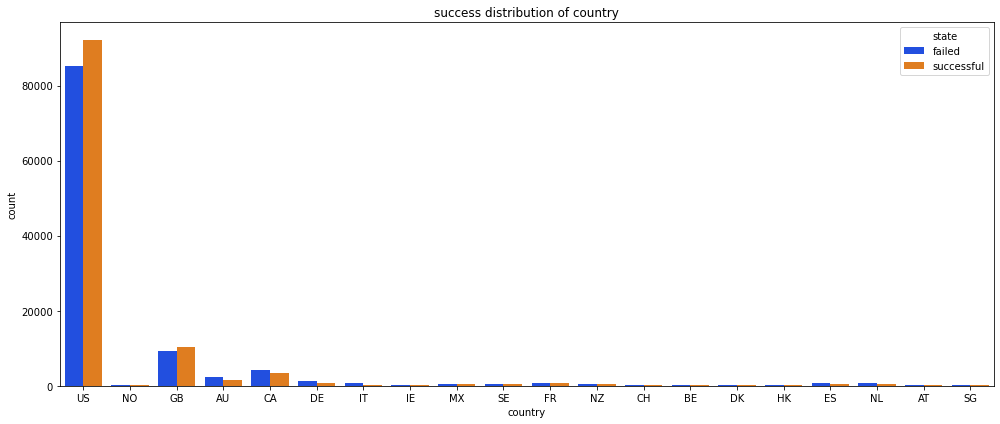

In [59]:
plt.figure(figsize=(14,6))
sns.countplot(x='country', hue='state', data=main_df, palette='bright')
plt.title("success distribution of country")
plt.tight_layout()

We can see from the graphs above that the vast majority of the projects are from USA. 
lets check the success percentage of each country.

In [60]:
grouped_country = main_df.groupby('country').agg({'binary_state': 'sum', 'state': 'count'})
grouped_country['succ_percent'] = grouped_country['binary_state']/grouped_country['state']
country_succ_dict = grouped_country['succ_percent'].to_dict()
country_succ_dict

{'AT': 0.2962962962962963,
 'AU': 0.41215189873417724,
 'BE': 0.3811074918566775,
 'CA': 0.45308132570211634,
 'CH': 0.33714285714285713,
 'DE': 0.3447927199191102,
 'DK': 0.4966216216216216,
 'ES': 0.38703339882121807,
 'FR': 0.4461942257217848,
 'GB': 0.5305893167194362,
 'HK': 0.4902597402597403,
 'IE': 0.42462311557788945,
 'IT': 0.2752902155887231,
 'MX': 0.5079155672823219,
 'NL': 0.3558282208588957,
 'NO': 0.4,
 'NZ': 0.4444444444444444,
 'SE': 0.42015005359056806,
 'SG': 0.4197952218430034,
 'US': 0.519731057958926}

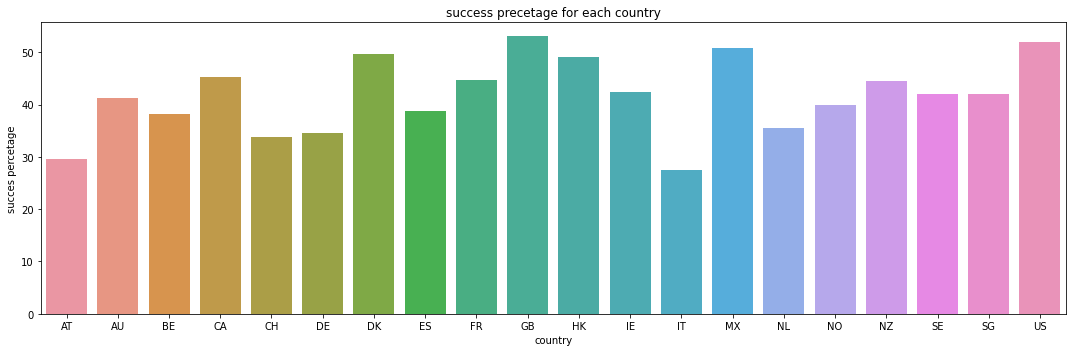

In [61]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x= grouped_country.index, y=grouped_country['succ_percent']*100, data = grouped_country)
plt.title("success precetage for each country")
plt.ylabel("succes percetage")
plt.tight_layout()

In [64]:
# the same we did with category...
main_df['succ_country'] = main_df['country'].map(country_succ_dict)
main_df.head()

,name,main_category,state,backers,country,pledged,goal,binary_state,succ_category,project_len,launched_month,deadline_month,succ_country
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,failed,15,US,2421.0,30000.0,0,0.417889,60,Sep,Nov,0.519731
2,Where is Hank?,Film & Video,failed,3,US,220.0,45000.0,0,0.417889,45,Jan,Feb,0.519731
6,Support Solar Roasted Coffee & Green Energy! ...,Food,successful,16,US,1205.0,1000.0,1,0.275914,20,Dec,Dec,0.519731
7,Chaser Strips. Our Strips make Shots their B*tch!,Food,failed,40,US,453.0,25000.0,0,0.275914,45,Feb,Mar,0.519731
11,Lisa Lim New CD!,Music,successful,100,US,12700.0,12500.0,1,0.526299,30,Mar,Apr,0.519731


### Goal

In [65]:
main_df['goal'].describe()

count    2.208840e+05
mean     2.331911e+04
std      6.259341e+05
min      1.000000e-02
25%      1.992322e+03
50%      5.000000e+03
75%      1.186803e+04
max      1.000000e+08
Name: goal, dtype: float64

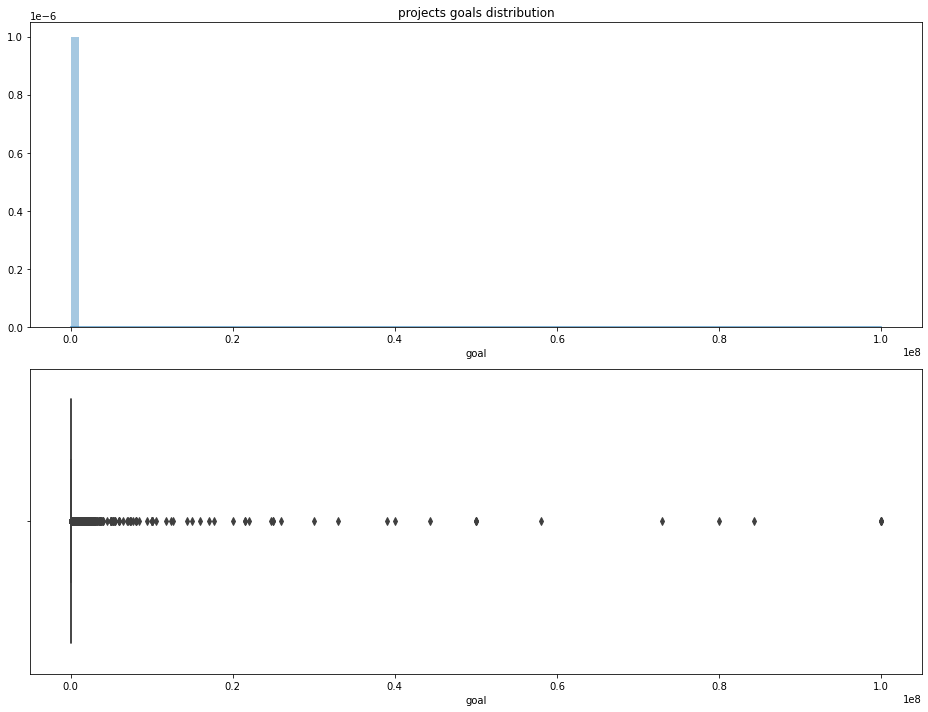

In [66]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (13,10))
sns.distplot(main_df['goal'], ax=ax[0], bins=100)
sns.boxplot(main_df['goal'], ax=ax[1])
ax[0].set_title('projects goals distribution')
plt.tight_layout()

we can see that the goal distribution is very skew to the left.  with high std(1.109*10^6) and max value(1.66*10^8) whitch extremly above the mean(4.14*10^4). So lets try to deal with it with the same way as 'pledged', 'backers'.

count    215820.000000
mean       9516.724250
std       13547.498379
min           0.010000
25%        1800.000000
50%        5000.000000
75%       10000.000000
max       99999.000000
Name: goal, dtype: float64

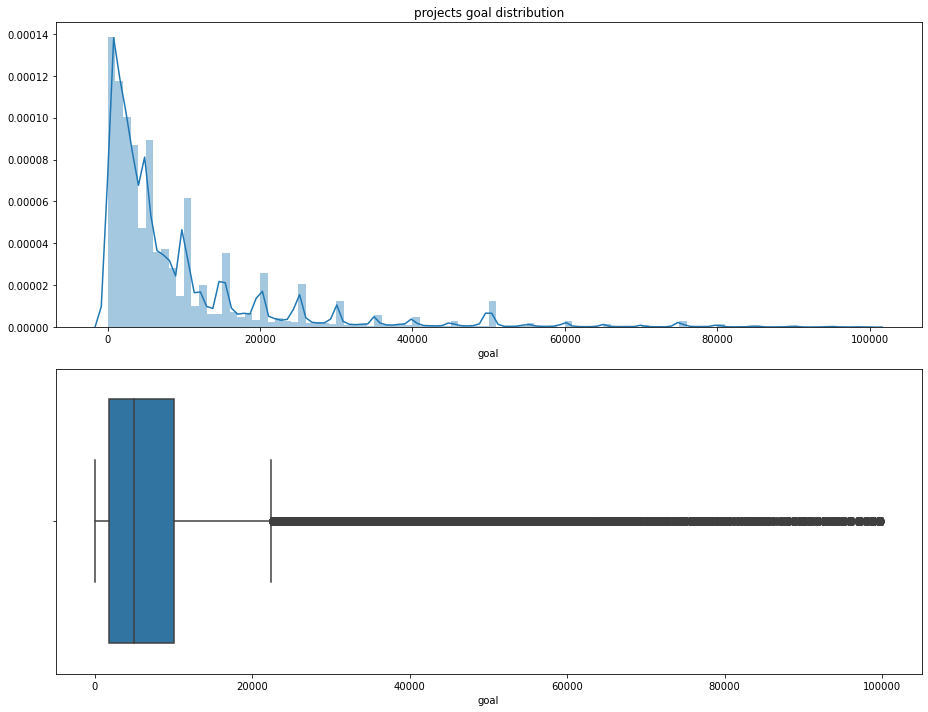

In [67]:
no_outliers_goal = main_df[main_df['goal'] < np.quantile(main_df['goal'],0.98)]['goal']

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (13,10))
sns.distplot(no_outliers_goal, ax=ax[0], bins=100)
sns.boxplot(no_outliers_goal, ax=ax[1])
ax[0].set_title('projects goal distribution')
plt.tight_layout()
no_outliers_goal.describe()

In [68]:
main_df = main_df[main_df['goal'] < np.quantile(main_df['goal'],0.98)]
main_df.shape

(215820, 13)

In [69]:
main_df[main_df['goal']>60000]['state'].value_counts() 

failed    3277
Name: state, dtype: int64

We got much clearly result after droping just 2% of the data from the right. the assumption is that to high value of goal is probably leading to failure. lets verify that by cheking the successfull projects with goal above 60000.

In [70]:
try:
    print("success rate of goal over 60000:",(main_df[main_df['goal']>60000]['state'].value_counts()['successful']/
                                                    main_df[main_df['goal']>60000]['state'].value_counts().sum())*100,'%')
except:
    print("there aren't successful project with goul over 60000")

there aren't successful project with goul over 60000


In [ ]:
print("success rate of goal under 60000:",(main_df[main_df['goal']<=60000]['state'].value_counts()['successful']/
                                                     main_df[main_df['goal']<=60000]['state'].value_counts().sum())*100,'%')

so lets drop projects with goal over 60,000 because they all failed

In [71]:
main_df = main_df[main_df['goal']<=60000]
main_df.shape

(212543, 13)

In [72]:
main_df['goal'].describe()

count    212543.000000
mean       8481.338047
std       10692.562532
min           0.010000
25%        1750.000000
50%        5000.000000
75%       10000.000000
max       60000.000000
Name: goal, dtype: float64

lets create a log_colName column for backers and goal in order to get columns with distrebution closely to normal,
in order to help our futer model.

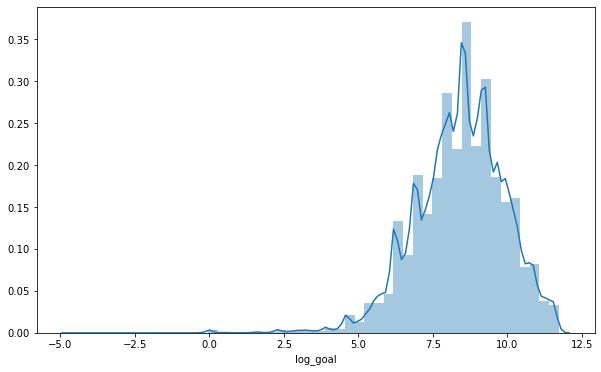

In [54]:
main_df['log_goal'] = main_df['goal'].apply(lambda x: np.log(x))
plt.figure(figsize=(10,6))
sns.distplot(main_df['log_goal'])

0.000000    28412
0.693147    19358
1.098612    13386
1.386294    10148
1.609438     8197
            ...  
6.622736        1
6.806829        1
6.783325        1
6.678342        1
6.670766        1
Name: log_backers, Length: 902, dtype: int64

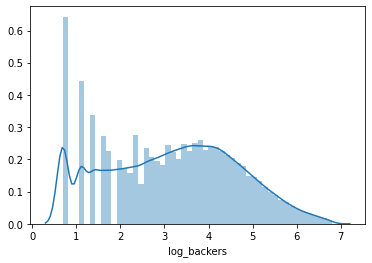

In [55]:
main_df['log_backers'] = main_df['backers'].apply(lambda x: np.log(x))
sns.distplot(main_df[main_df['log_backers'] >0]['log_backers'])
main_df['log_backers'].value_counts()

we can see that this distribution dowsent hekp us and log backers have -inffinity values, so we'll drop it

In [56]:
main_df.drop('log_backers', axis=1,inplace=True)

after some data has been dropped, lets view again our pychart of succesfull and failed

Text(0.5, 1.0, 'distibution of the projects state')

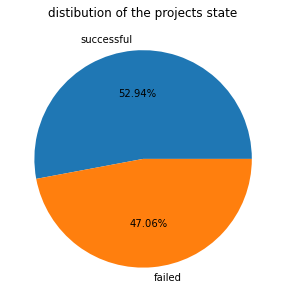

In [74]:
plt.figure(figsize=(8,5))
plt.pie(x = main_df['state'].value_counts(),
        labels = main_df['state'].value_counts().index,
        autopct='%1.2f%%')
plt.title('distibution of the projects state')

after some data cleaning we have a much more equally distribution.

In [75]:
main_df.shape

(212543, 13)

# Feature Engineering

In [77]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, classification_report, mean_squared_error, auc, roc_curve

Some usefull functions we'll use during the process

In [94]:
def cat_numer_split(df):
    numericals = df.select_dtypes(include=['float64', 'int64'])
    categorials = df.select_dtypes(include=['object'])
    return numericals, categorials

In [95]:
def plot_corr(numericals_corr, title):
    plt.figure(figsize=(7,7))
    sns.heatmap(numericals_corr, annot=True)
    plt.title(title + " numericals corolation")
    plt.tight_layout()
    plt.show()

In [96]:
def anova(numericals, target):
    
    anova_test = pd.DataFrame(data = f_classif(numericals.drop(['binary_state'], axis=1), target),
             columns = numericals.drop(['binary_state'], axis=1).columns,
             index = ['F-statistic','p-value'])
    return (anova_test)

In [97]:
def chi2_test(categorials, target):
    from scipy.stats import chi2_contingency  
    p_values = []
    chi2_results = []
    for col in categorials.drop('state', axis=1).columns:
        cross_tab = pd.crosstab(categorials[col], target)
        chi2, p_val, deg_of_free, expected = chi2_contingency(cross_tab)
        p_values.append(p_val)
        chi2_results.append(chi2)
    chi2_test = list(zip(categorials.drop('state', axis=1).columns, chi2_results, p_values))
    chi2_test = pd.DataFrame(chi2_test, columns=['col_name', 'chi2', 'p_value'])
    return(chi2_test)

In [98]:
def scale_data(numericals):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numericals)
    scaled_data = pd.DataFrame(scaled_data, columns = ['scaled_'+col for col in numericals.columns]).reset_index(drop=True)
    return scaled_data 

In [99]:
# k is set to 4 as default after using the elbow point principal
def set_kmeans(df, k=4):
    kmeans = KMeans(n_clusters = k)
    kmeans_predictions = kmeans.fit_predict(df.drop('binary_state',axis=1))
    df[f'cluster{k}'] = kmeans_predictions
    df[f'cluster{k}'] = df[f'cluster{k}'].apply(lambda x: str(x))
    return df

In [100]:
def dummy(categorials):
    dummies = pd.get_dummies(categorials, drop_first=True).reset_index(drop=True)
    return dummies

In [101]:
def set_data(df):
    numericals, categorials = cat_numer_split(df)
    numericals = scale_data(numericals.drop('binary_state', axis=1))
    categorials = dummy(categorials)
    target = df['binary_state']
    final_df = pd.concat([numericals.reset_index(drop=True), categorials.reset_index(drop=True)], axis=1)
    final_df = pd.concat([final_df.reset_index(drop=True), target.reset_index(drop=True)], axis=1)
    return final_df

In [102]:
def encode(df):
    encoder = LabelEncoder()
    for col in df.columns:
        df[col] = encoder.fit_transform(df[col])
    return df

In [122]:
def RocCurvePlot(model_names, fpr, tpr, auc_scores):
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y']
    figure = plt.figure(figsize = (12,8))

    for index, (name, auc, color) in enumerate(zip(model_names, auc_scores, colors)):
        
        plt.plot(fpr[index], tpr[index], color = color, label= f'{name} auc: {"%.3f"%auc}')

    plt.plot([0,1], [0,1], color='black', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('ROC CURVE')
    plt.legend()

In [114]:
# this function gets a dataset, splits the data to train and test subsets,
# and returns the scores of each algorithm and the, model that performed best in terms of precision.
# The metric precision was selected because I'd rather tell someone that his project is heading to failure and it won't then
# tell someone his project will probably succeed and it it will fail. 

def predictions_score(df):
    X1 = df.drop('binary_state', axis=1)
    y1 = df['binary_state']
    x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
    forestCV = GridSearchCV(estimator=RandomForestClassifier(), cv=10, param_grid={'n_estimators':[100,200,300]}, scoring='precision')
    log_regressionCV = GridSearchCV(estimator=LogisticRegression(), cv=10, param_grid = {'solver':['lbfgs','sag'],
                                          'C': [0.01,0.1,0.5,1]}, scoring='precision')
    treeCV = GridSearchCV(estimator=DecisionTreeClassifier(), cv=10, param_grid={'criterion':["gini", "entropy"]}, scoring='precision')  
    NB = GridSearchCV(estimator=GaussianNB(), param_grid={}, scoring = 'precision')
    knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors':[3,5,7,9],'metric':['euclidean', 'manhattan']},
                       scoring='precision')
    svm = SVC(probability=True)
    models = [forestCV, log_regressionCV, treeCV, NB, knn, svm]
    model_name = ['RandomForestCV', 'LogisticRegressionCV', 'DecisionTreeCV', 'NaiveBayesCV', 'KnnCV','SVM']
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    auc_scores = []
    fit_models = []
    confusion_matrixes = []
    roc_data = {'fpr': [], 'tpr': []}
    for model, name in zip(models, model_name):
        fit_models.append(model.fit(x1_train, y1_train))
        predictions = model.predict(x1_test)
        f1_scores.append(f1_score(y1_test, predictions))
        precision_scores.append(precision_score(y1_test,predictions))
        recall_scores.append(recall_score(y1_test, predictions))
        accuracy_scores.append(accuracy_score(y1_test, predictions))
        probs = model.predict_proba(x1_test)
        probs = probs[:, 1]
        fpr, tpr, thresholds = roc_curve(y1_test, probs)
        roc_data['fpr'].append(fpr)
        roc_data['tpr'].append(tpr)
        auc_scores.append(roc_auc_score(y1_test, probs))
        confusion_matrixes.append(confusion_matrix(y1_test, predictions))
        print(f'{name} is done')
    
    data = zip(model_name, f1_scores, precision_scores, recall_scores, accuracy_scores, auc_scores)
    data = pd.DataFrame(data, columns=['Name', 'f1', 'precision', 'recall', 'accuracy', 'auc'])
    return (data, fit_models, confusion_matrixes, roc_data)
 
    

In [149]:
def plot_confusion_matrixes(names, confusion_mats):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    for name, confusion_mat, ax in zip(names, confusion_mats, axes.flatten()):
        sns.heatmap(data = confusion_mat, ax=ax, cmap='Blues', fmt='.5g', annot=True,
                    xticklabels=['failed', 'succeed'], yticklabels=['failed', 'succeed'])
        ax.set_title(f'{name} confusion matrix')
        plt.xlabel('predictions')
        plt.ylabel('true')
        plt.tight_layout()
    

In [85]:
numericals, categorials = cat_numer_split(main_df)

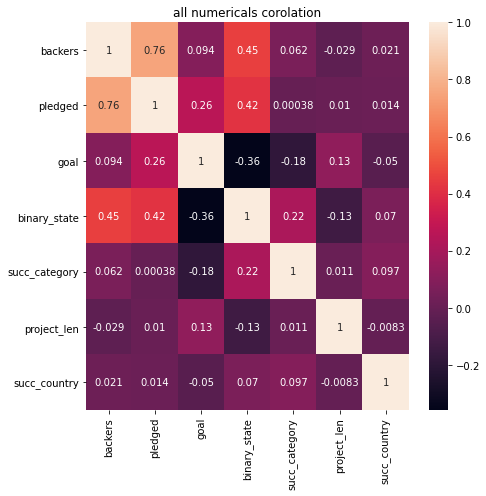

In [86]:
plot_corr(numericals.corr(), 'all')

In [69]:
chi2_results = chi2_test(categorials, main_df['state'])
chi2_results

,col_name,chi2,p_value
0,name,273364.472602,4.179545e-01
1,main_category,15641.949567,0.000000e+00
2,country,1703.886873,0.000000e+00
3,launched_month,335.610132,2.677225e-65
4,deadline_month,293.487670,2.060895e-56


we can see that all columns except name have dependancy to the state column, so we won't use the name column  

lets display the anova test results

In [70]:
anova(numericals, main_df['state'])

,backers,pledged,goal,succ_category,project_len,succ_country,log_goal
F-statistic,65985.623196,69611.427941,23970.218798,15006.138675,4518.966861,1713.728534,25656.427381
p-value,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


we can see that we have got statisticly sagnificant high values of f-statistic, which means these coulmns should be used in our model. 
Note: we'll drop  'pledged' due to the fact that it's an information that is known at the end of the campaign.

In [87]:
main_df.drop(['name', 'pledged'], axis=1, inplace=True)

In [88]:
inverse_month_dict = {value: str(key) for key, value in month_dict.items()}
main_df['launched_month'] = main_df['launched_month'].map(inverse_month_dict)
main_df['deadline_month'] = main_df['deadline_month'].map(inverse_month_dict)
main_df[['launched_month', 'deadline_month']]

,launched_month,deadline_month
1,9,11
2,1,2
6,12,12
7,2,3
11,3,4
...,...,...
378652,3,4
378654,3,4
378657,6,7
378659,1,2


In [89]:
main_df

,main_category,state,backers,country,goal,binary_state,succ_category,project_len,launched_month,deadline_month,succ_country
1,Film & Video,failed,15,US,30000.00,0,0.417889,60,9,11,0.519731
2,Film & Video,failed,3,US,45000.00,0,0.417889,45,1,2,0.519731
6,Food,successful,16,US,1000.00,1,0.275914,20,12,12,0.519731
7,Food,failed,40,US,25000.00,0,0.275914,45,2,3,0.519731
11,Music,successful,100,US,12500.00,1,0.526299,30,3,4,0.519731
...,...,...,...,...,...,...,...,...,...,...,...
378652,Film & Video,successful,36,NO,2675.19,1,0.417889,30,3,4,0.400000
378654,Food,failed,4,US,6500.00,0,0.275914,30,3,4,0.519731
378657,Film & Video,failed,5,US,1500.00,0,0.417889,27,6,7,0.519731
378659,Technology,failed,6,US,15000.00,0,0.237854,31,1,2,0.519731


### Note:

1.the algorithms performed better on 'country' & 'category' as dummy variables rather with their success rates.
2.the algorithms performed better on 'log_goal' rather on 'goal'.

In [116]:
main_df = main_df.drop(['state', 'goal', 'succ_category', 'succ_country', 'launched_month', 'deadline_month'], axis=1)
final_df = set_data(main_df)
final_df.head()

,scaled_backers,scaled_project_len,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,...,country_IE,country_IT,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,binary_state
0,-0.598367,2.132281,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.784978,0.928735,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.582816,-1.077176,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,-0.209593,0.928735,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.723463,-0.274812,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Text(0, 0.5, 'sse')

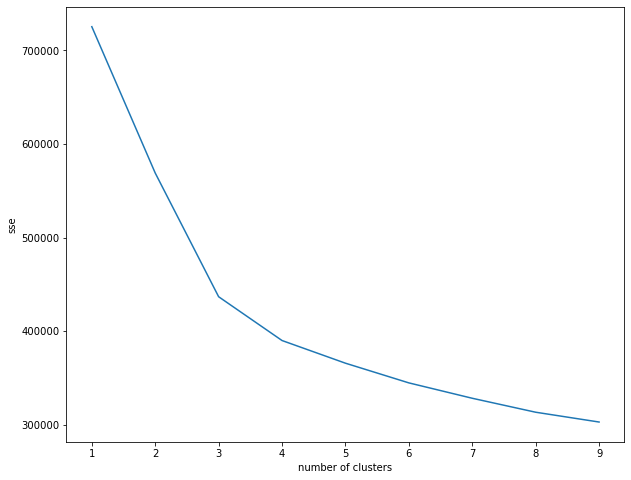

In [110]:
squred_errors = {}
for k in range(1,10):
    k_means = KMeans(n_clusters=k, max_iter=1000)
    k_means.fit(final_df)
    squre_errors[k] = (k_means.inertia_)
plt.figure(figsize=(10,8))
plt.plot(list(squre_errors.keys()), list(squre_errors.values()))
plt.xlabel("number of clusters")
plt.ylabel("sse")

    

In [118]:
final_df =set_kmeans(final_df, 4) 
data, best_model, confusion_matrixes, roc_data = predictions_score(final_df)

RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done


In [119]:
data

,Name,f1,precision,recall,accuracy,auc
0,RandomForestCV,0.803589,0.795474,0.811871,0.789386,0.859182
1,LogisticRegressionCV,0.794636,0.827368,0.764396,0.790327,0.862667
2,DecisionTreeCV,0.779984,0.794211,0.766257,0.770590,0.800958
3,NaiveBayesCV,0.711689,0.622698,0.830356,0.642970,0.735911
4,KnnCV,0.813093,0.800197,0.826411,0.798372,0.866979
5,SVM,0.825540,0.814049,0.837360,0.812181,0.881901


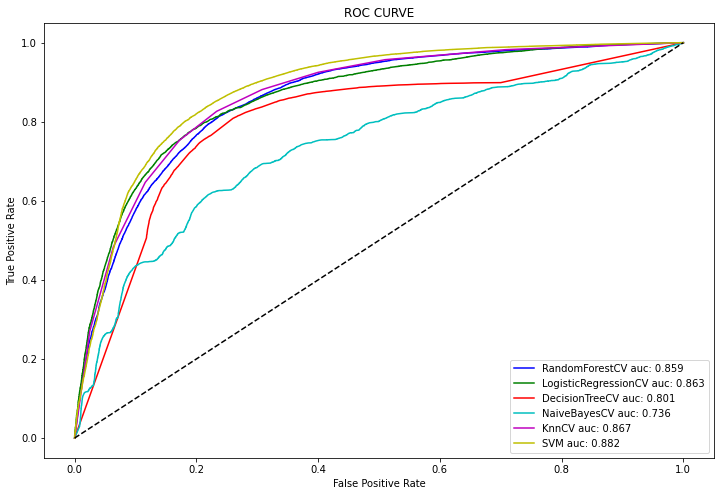

In [120]:
RocCurvePlot(data['Name'].tolist(), roc_data['fpr'], roc_data['tpr'], data['auc'].tolist())

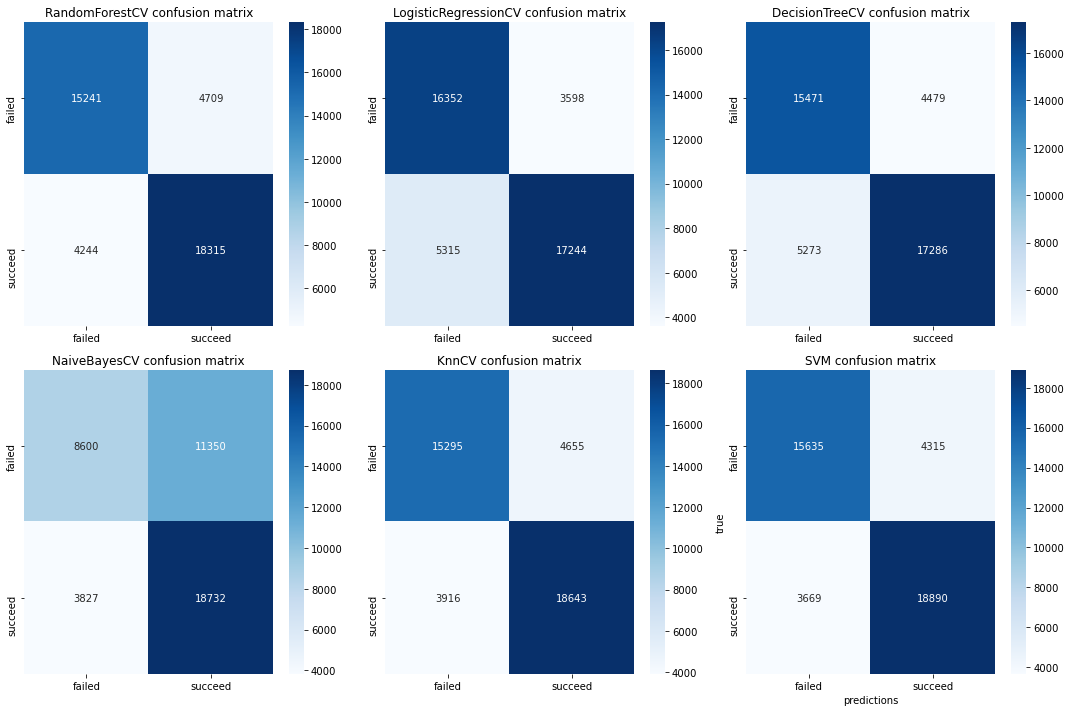

In [150]:
plot_confusion_matrixes(data['Name'], confusion_matrixes)

[array([[15241,  4709],
        [ 4244, 18315]], dtype=int64),
 array([[16352,  3598],
        [ 5315, 17244]], dtype=int64),
 array([[15471,  4479],
        [ 5273, 17286]], dtype=int64),
 array([[ 8600, 11350],
        [ 3827, 18732]], dtype=int64),
 array([[15295,  4655],
        [ 3916, 18643]], dtype=int64),
 array([[15635,  4315],
        [ 3669, 18890]], dtype=int64)]

## Predictions on data divided to categories 

In [151]:
from collections import defaultdict
category_dict = defaultdict(dict)
category_data = dict()

In [152]:
for cat in main_df['main_category'].unique():
    category_data[cat] = main_df[main_df['main_category'] == cat].drop('main_category', axis=1)
    print(f'{cat}: {category_data[cat].shape[0]}')

Film & Video: 36638
Food: 12905
Music: 33476
Design: 16109
Comics: 7986
Publishing: 22350
Theater: 8420
Art: 17805
Photography: 6040
Games: 17754
Fashion: 11398
Technology: 12166
Journalism: 2018
Dance: 3007
Crafts: 4471


In [153]:
category_data['Food']

,backers,country,binary_state,project_len
6,16,US,1,20
7,40,US,0,45
19,40,US,0,30
23,3,NO,0,30
88,18,US,0,30
...,...,...,...,...
378545,37,US,1,16
378561,98,US,1,15
378629,42,US,0,30
378639,103,US,1,30


In [154]:
for cat, data in category_data.items():
    data = set_data(data)
    final_data = set_kmeans(data, 4)
    category_dict[cat]['scores'], category_dict[cat]['models'], category_dict[cat]['confusion_matrixes'], category_dict[cat]['roc_data'] = predictions_score(final_data)

RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayesCV is done
KnnCV is done
SVM is done


In [155]:
for cat in category_dict.keys():    
    print(cat)
    print(category_dict[cat]['scores'])

Film & Video
                   Name        f1  precision    recall  accuracy       auc
0        RandomForestCV  0.803302   0.776928  0.831528  0.769105  0.829522
1  LogisticRegressionCV  0.792415   0.822585  0.764380  0.772926  0.843557
2        DecisionTreeCV  0.784446   0.782380  0.786522  0.754913  0.795963
3          NaiveBayesCV  0.721824   0.570411  0.982671  0.570551  0.781878
4                 KnnCV  0.812340   0.786697  0.839711  0.780022  0.836441
5                   SVM  0.821789   0.802200  0.842359  0.792849  0.846541
Food
                   Name        f1  precision    recall  accuracy       auc
0        RandomForestCV  0.743310   0.756811  0.730282  0.799303  0.868307
1  LogisticRegressionCV  0.709459   0.841121  0.613437  0.800077  0.880058
2        DecisionTreeCV  0.727180   0.763383  0.694255  0.792716  0.807160
3          NaiveBayesCV  0.570118   0.404065  0.967868  0.419217  0.830007
4                 KnnCV  0.732106   0.770721  0.697176  0.796978  0.866200
5      

In [124]:
for cat, data in category_data.items():
    data = set_data(data)
    data = set_kmeans(data, 4)
    category_dict[cat]['scores'], category_dict[cat]['models'], category_dict[cat]['confusion_matrixes'], category_dict[cat]['roc_data'] = predictions_score(data)

RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done
LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done
RandomForestCV is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asafk\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

LogisticRegressionCV is done
DecisionTreeCV is done
NaiveBayes is done


C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "C:\Users\asafk\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 332, in _check_algorithm_metric
    raise ValueError("Metric '%s' not valid. Use "
ValueError: Metric 'manhatten' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function

KNN is done
SVM is done


Film & Video
                   Name        f1  precision    recall  accuracy       auc
0        RandomForestCV  0.803302   0.776928  0.831528  0.769105  0.829522
1  LogisticRegressionCV  0.792415   0.822585  0.764380  0.772926  0.843557
2        DecisionTreeCV  0.784446   0.782380  0.786522  0.754913  0.795963
3          NaiveBayesCV  0.721824   0.570411  0.982671  0.570551  0.781878
4                 KnnCV  0.812340   0.786697  0.839711  0.780022  0.836441
5                   SVM  0.821789   0.802200  0.842359  0.792849  0.846541
Food
                   Name        f1  precision    recall  accuracy       auc
0        RandomForestCV  0.743310   0.756811  0.730282  0.799303  0.868307
1  LogisticRegressionCV  0.709459   0.841121  0.613437  0.800077  0.880058
2        DecisionTreeCV  0.727180   0.763383  0.694255  0.792716  0.807160
3          NaiveBayesCV  0.570118   0.404065  0.967868  0.419217  0.830007
4                 KnnCV  0.732106   0.770721  0.697176  0.796978  0.866200
5      

<ipython-input-122-cbe942ab2923>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize = (12,8))
<ipython-input-149-9ba835a3c0a1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))


Technology
                   Name        f1  precision    recall  accuracy       auc
0        RandomForestCV  0.554913   0.612022  0.507553  0.778554  0.801929
1  LogisticRegressionCV  0.490079   0.713873  0.373112  0.788825  0.836545
2        DecisionTreeCV  0.532203   0.606178  0.474320  0.773213  0.709054
3          NaiveBayesCV  0.583799   0.542857  0.631420  0.755136  0.748729
4                 KnnCV  0.585691   0.651852  0.531722  0.795399  0.823338
5                   SVM  0.569395   0.692641  0.483384  0.801150  0.819144


<ipython-input-122-cbe942ab2923>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize = (12,8))
<ipython-input-149-9ba835a3c0a1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))


Journalism
                   Name        f1  precision    recall  accuracy       auc
0        RandomForestCV  0.749296   0.777778  0.722826  0.779703  0.872295
1  LogisticRegressionCV  0.628571   0.916667  0.478261  0.742574  0.885487
2        DecisionTreeCV  0.733524   0.775758  0.695652  0.769802  0.758337
3          NaiveBayesCV  0.616725   0.453846  0.961957  0.455446  0.800914
4                 KnnCV  0.773639   0.818182  0.733696  0.804455  0.872320
5                   SVM  0.754601   0.866197  0.668478  0.801980  0.899852


<ipython-input-122-cbe942ab2923>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize = (12,8))
<ipython-input-149-9ba835a3c0a1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))


Dance
                   Name        f1  precision    recall  accuracy       auc
0        RandomForestCV  0.907895   0.900000  0.915929  0.860465  0.881844
1  LogisticRegressionCV  0.927568   0.906977  0.949115  0.888704  0.914263
2        DecisionTreeCV  0.874859   0.891954  0.858407  0.815615  0.786740
3          NaiveBayesCV  0.825511   0.905013  0.758850  0.759136  0.827124
4                 KnnCV  0.916844   0.884774  0.951327  0.870432  0.884277
5                   SVM  0.928571   0.908898  0.949115  0.890365  0.887832


<ipython-input-122-cbe942ab2923>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize = (12,8))
<ipython-input-149-9ba835a3c0a1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))


Crafts
                   Name        f1  precision    recall  accuracy       auc
0        RandomForestCV  0.718708   0.752113  0.688144  0.766480  0.850543
1  LogisticRegressionCV  0.687211   0.854406  0.574742  0.773184  0.847859
2        DecisionTreeCV  0.719008   0.772189  0.672680  0.772067  0.797914
3          NaiveBayesCV  0.610000   0.450739  0.943299  0.477095  0.775115
4                 KnnCV  0.762155   0.777480  0.747423  0.797765  0.855983
5                   SVM  0.752113   0.829193  0.688144  0.803352  0.874609


<ipython-input-122-cbe942ab2923>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize = (12,8))
<ipython-input-149-9ba835a3c0a1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))


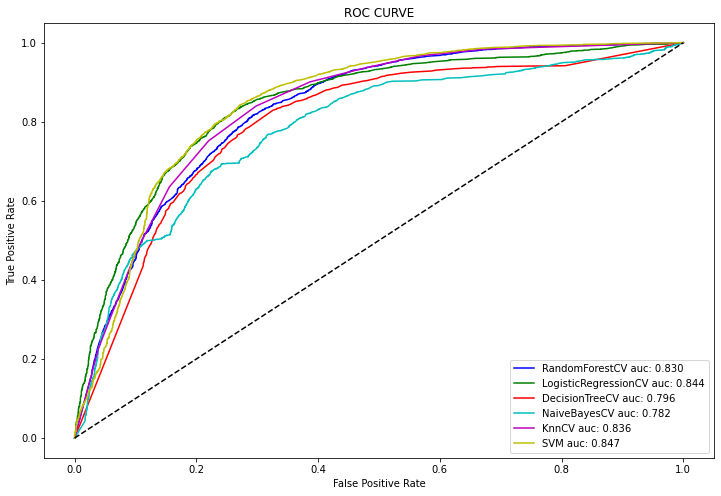

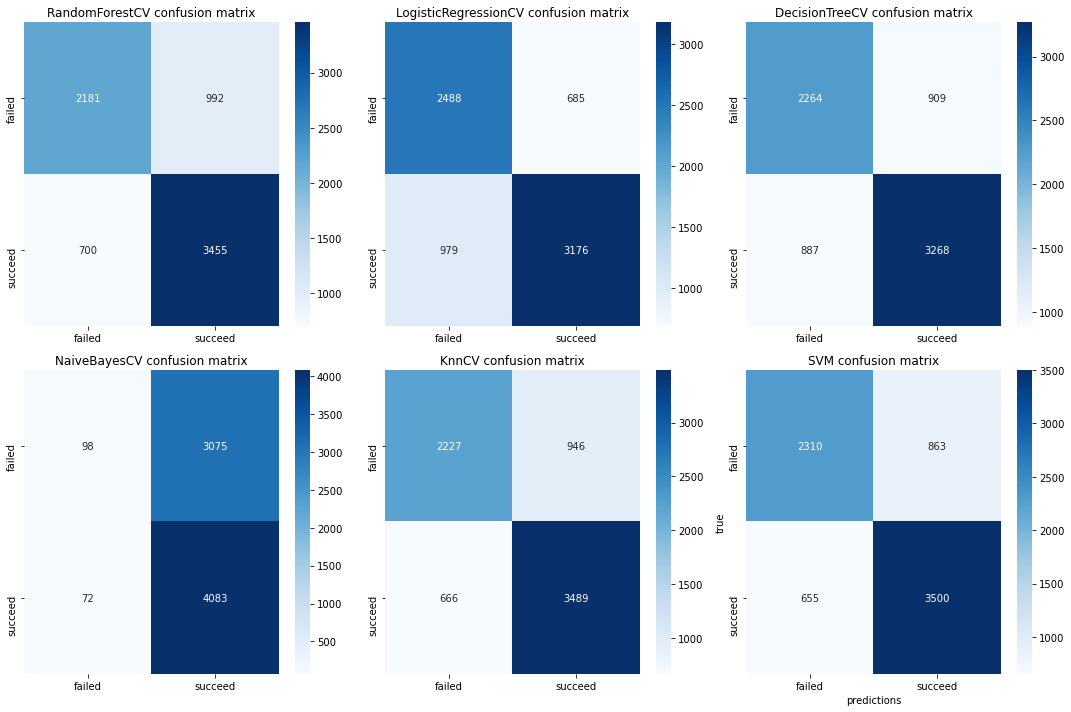

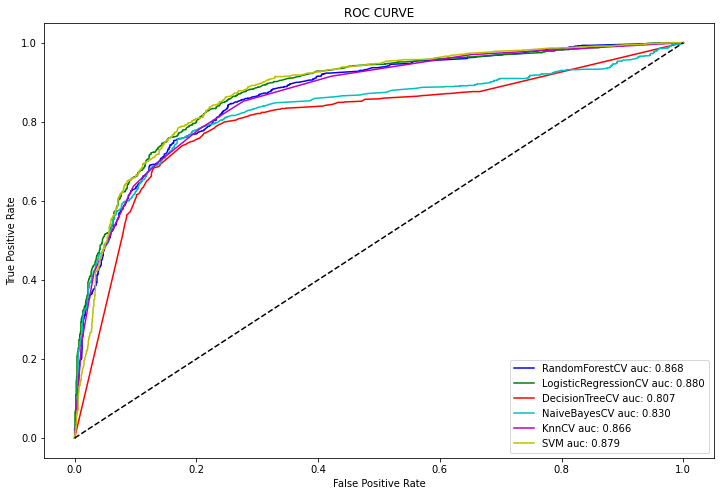

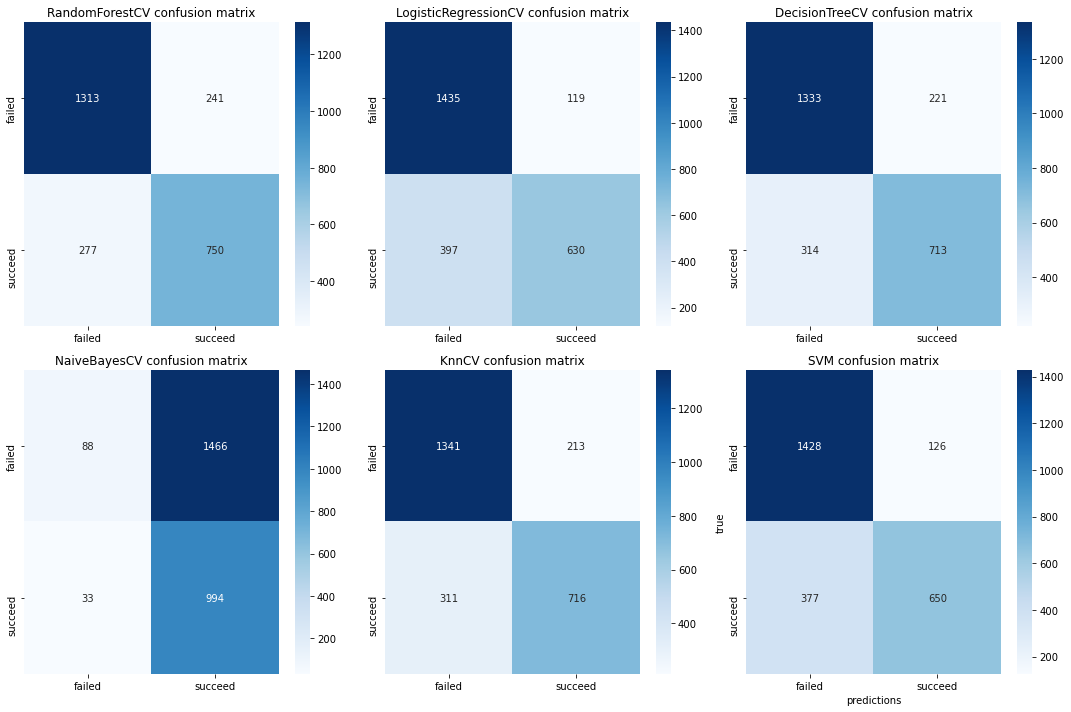

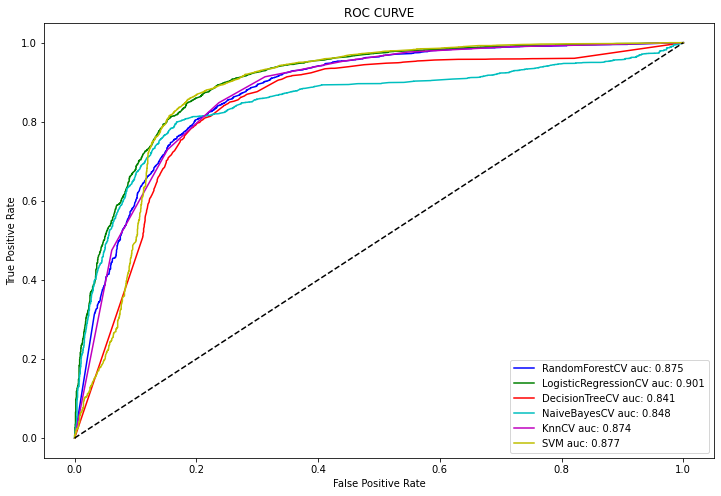

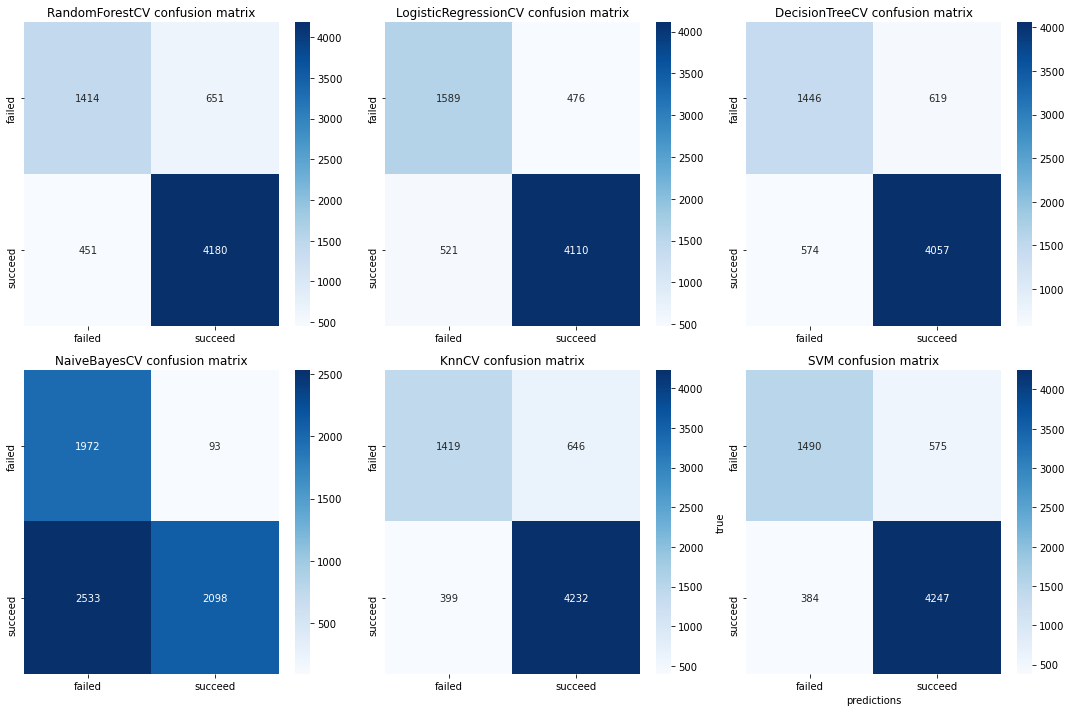

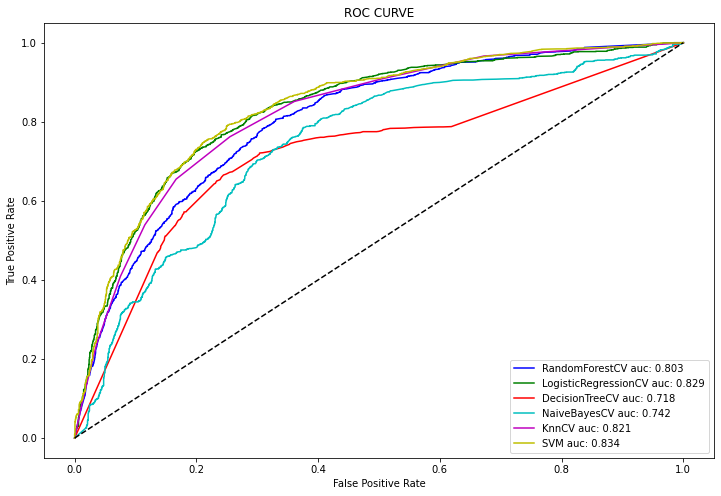

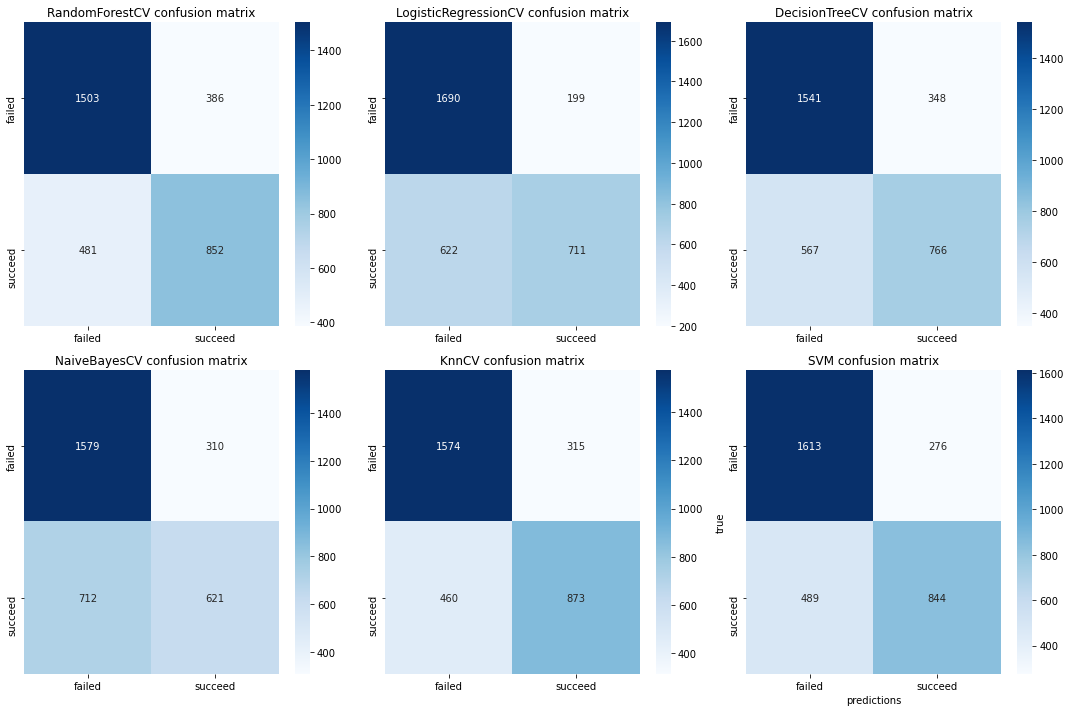

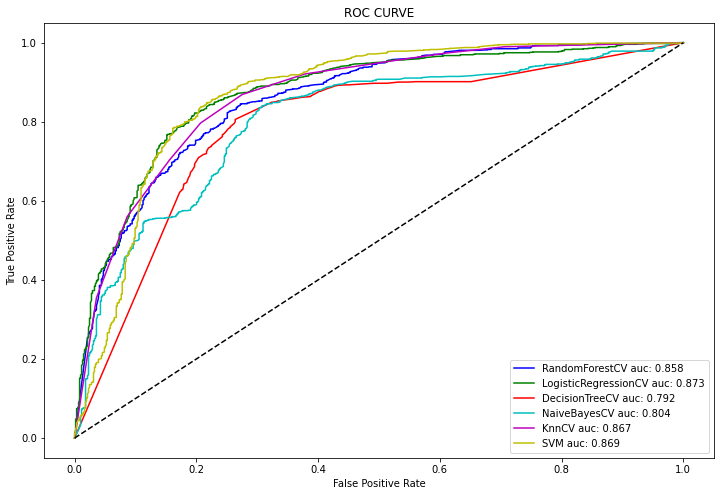

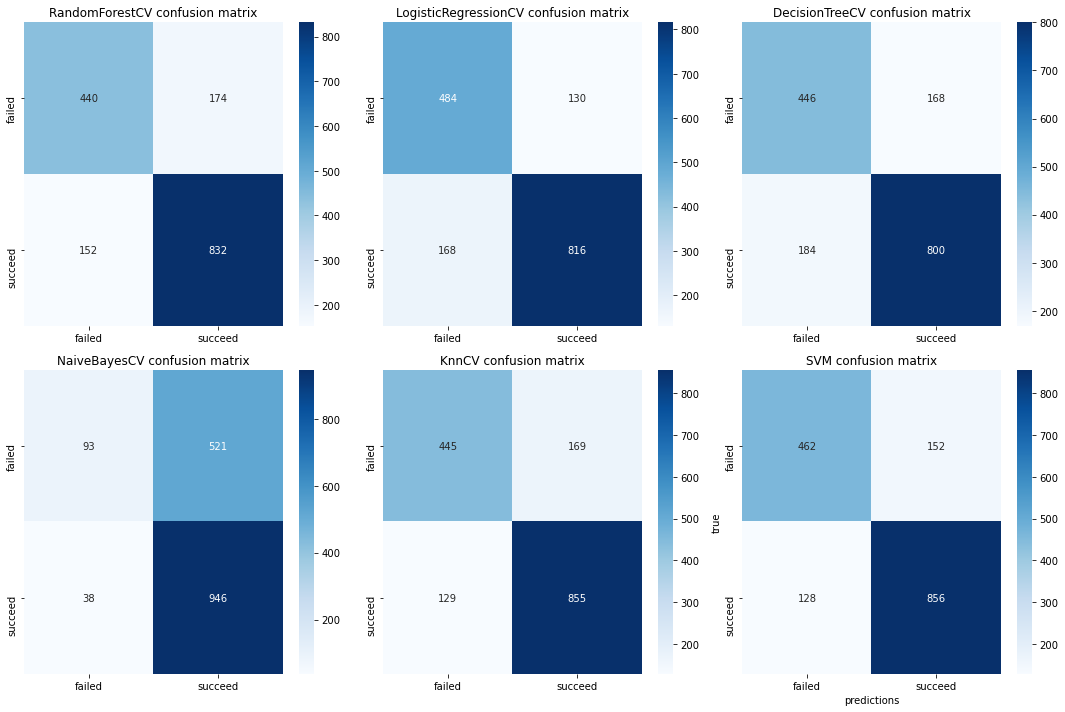

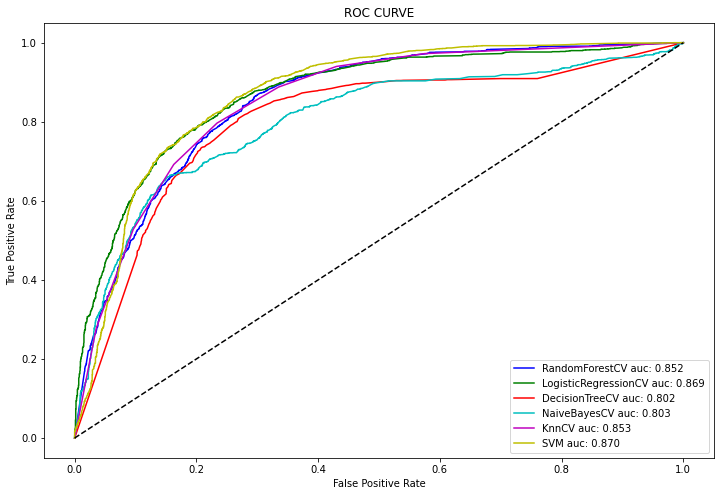

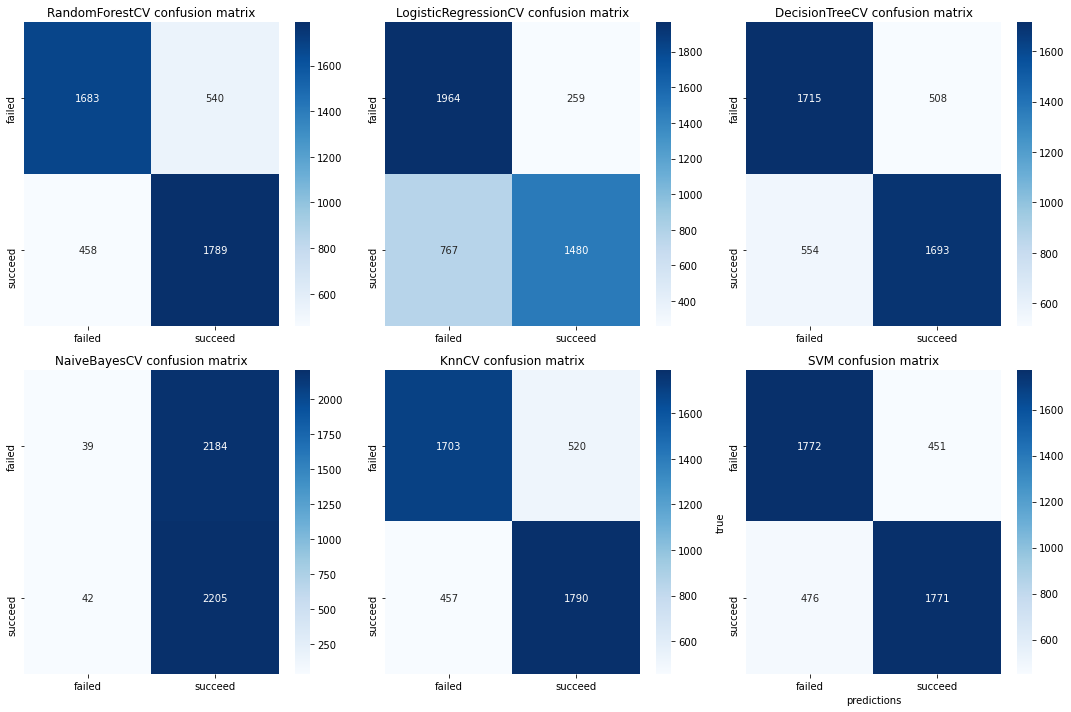

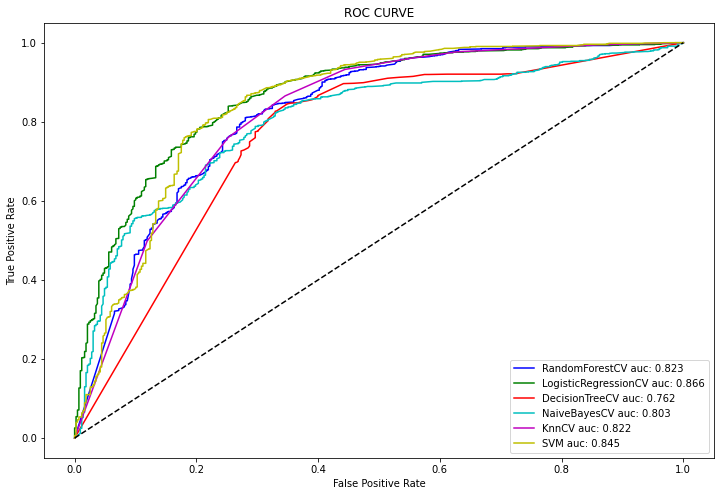

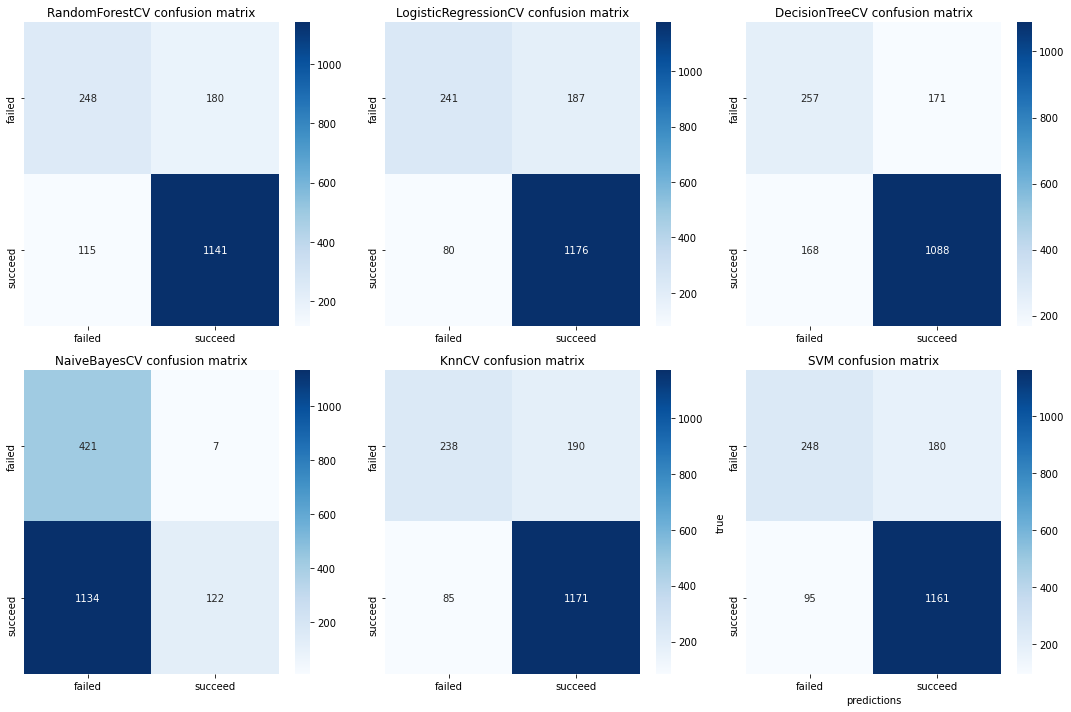

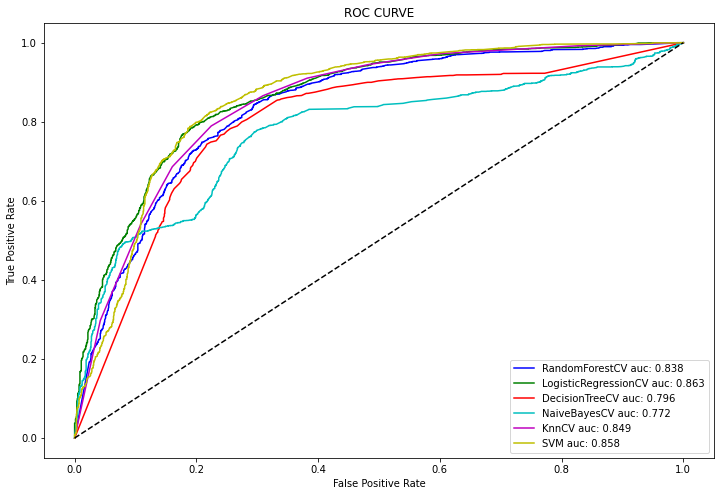

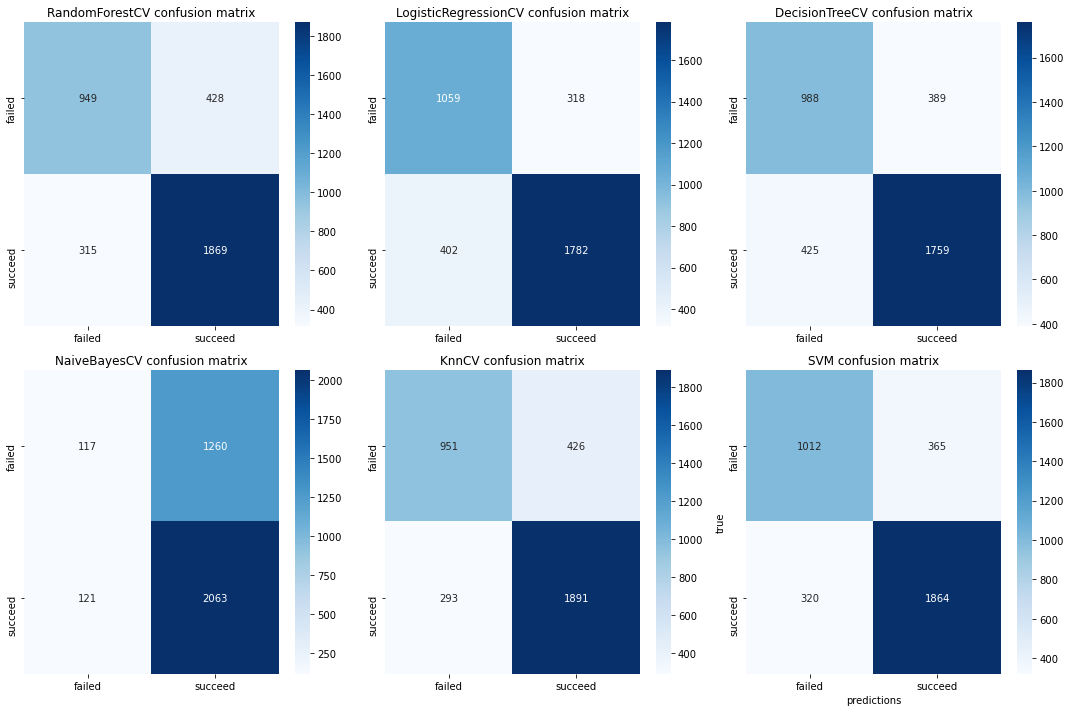

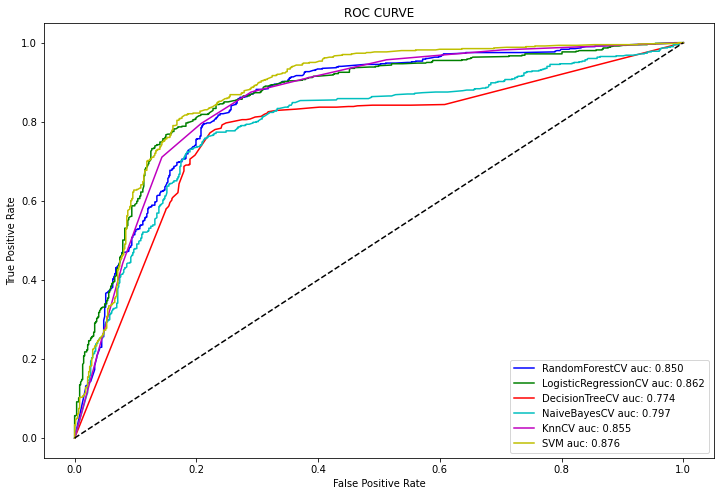

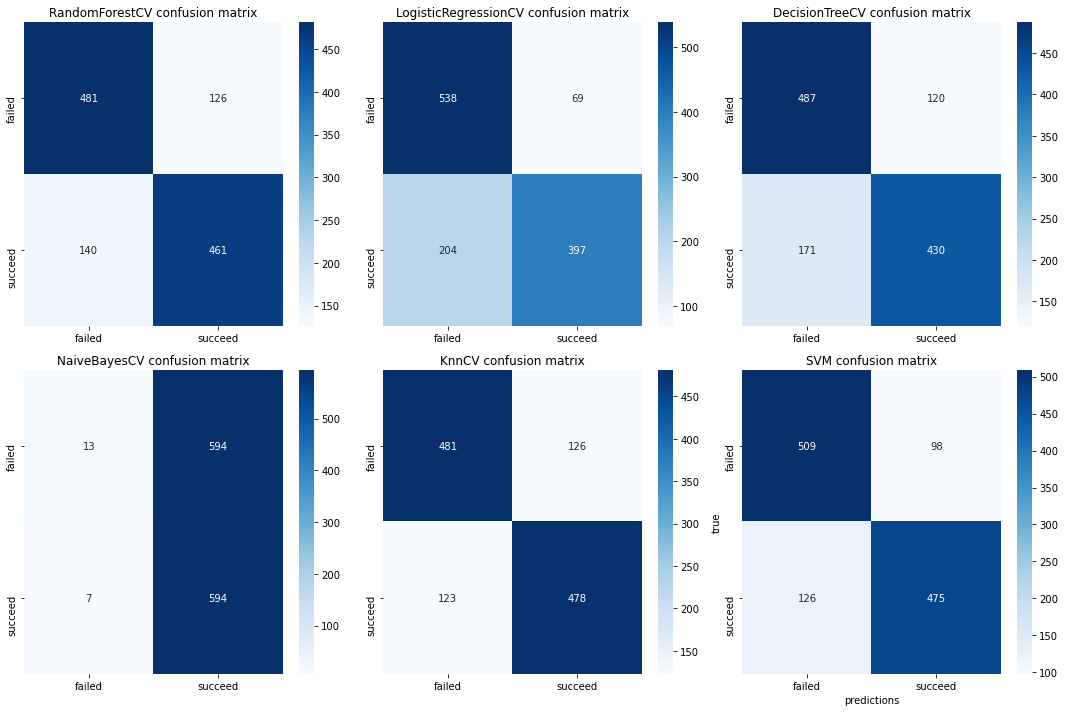

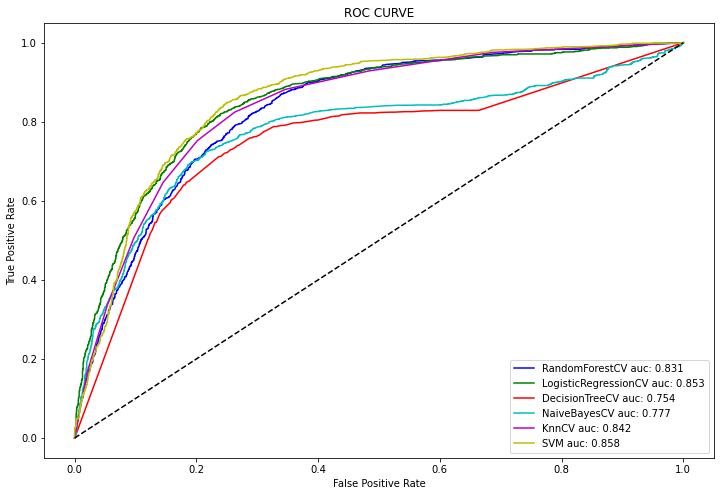

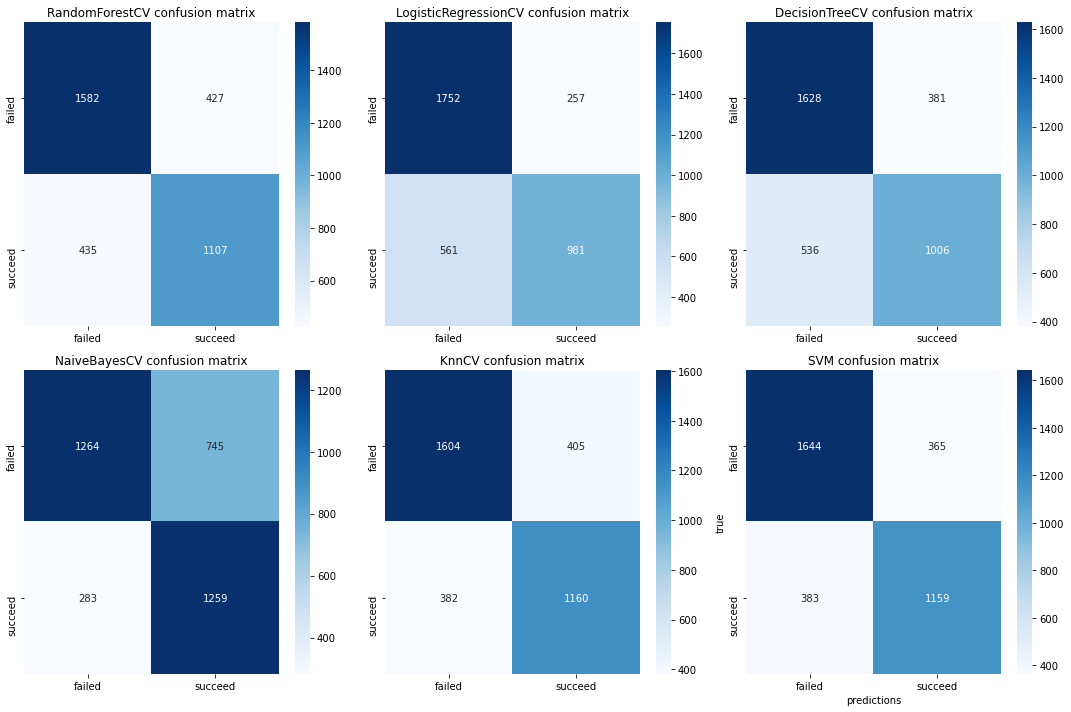

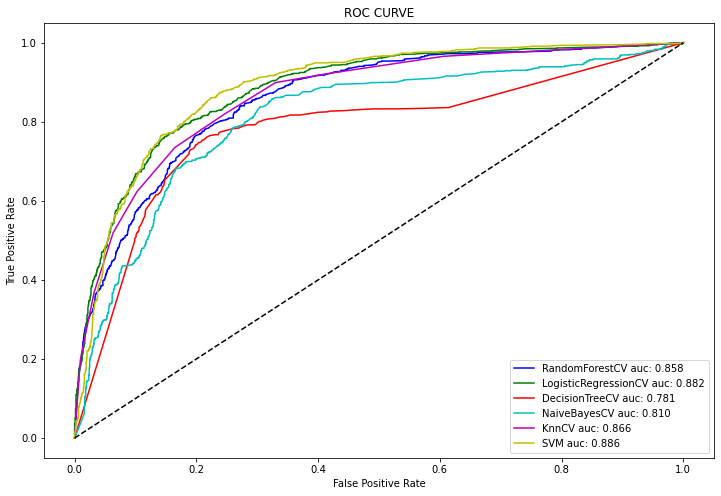

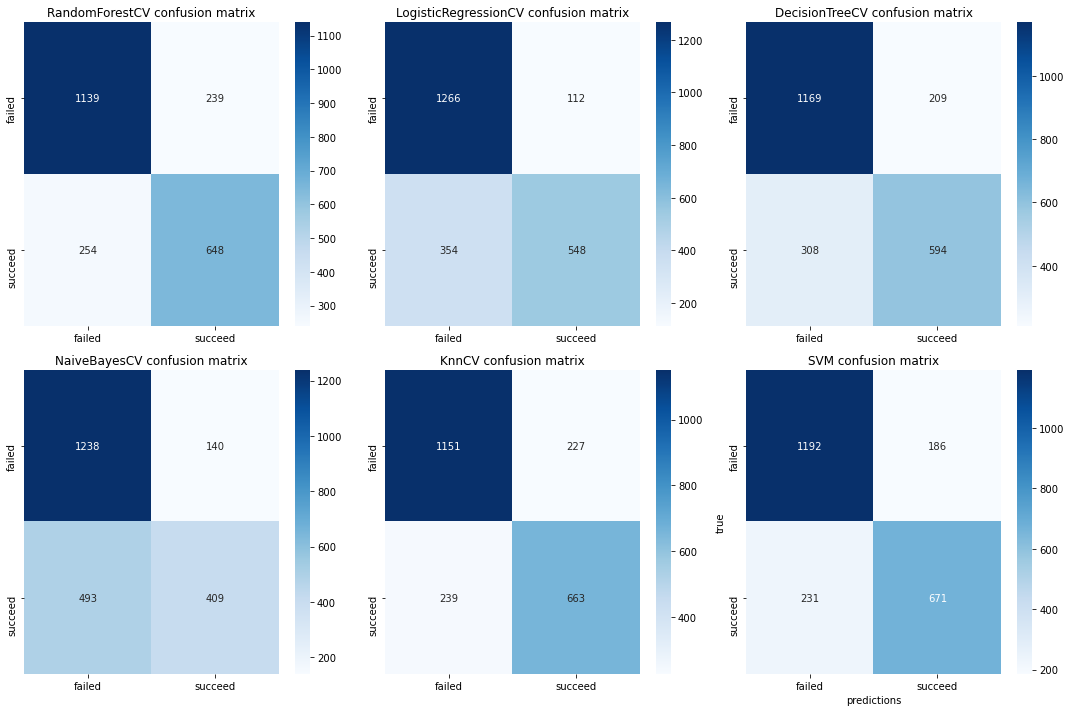

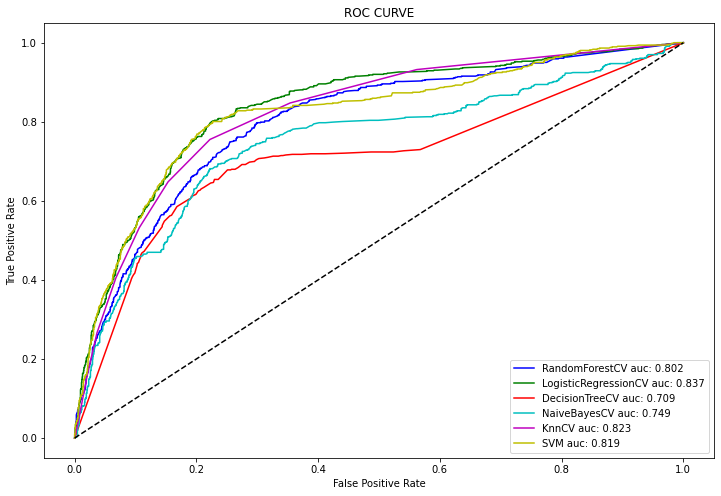

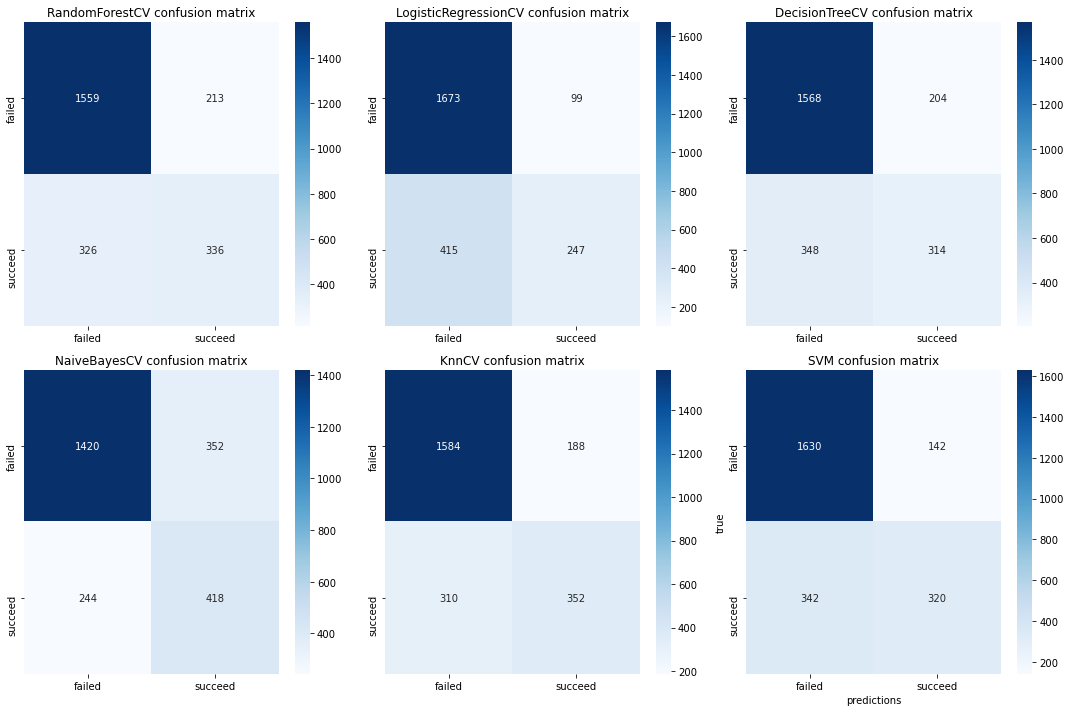

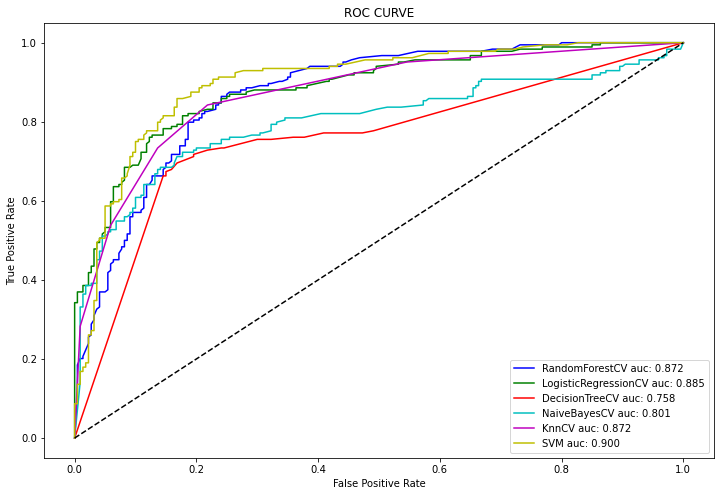

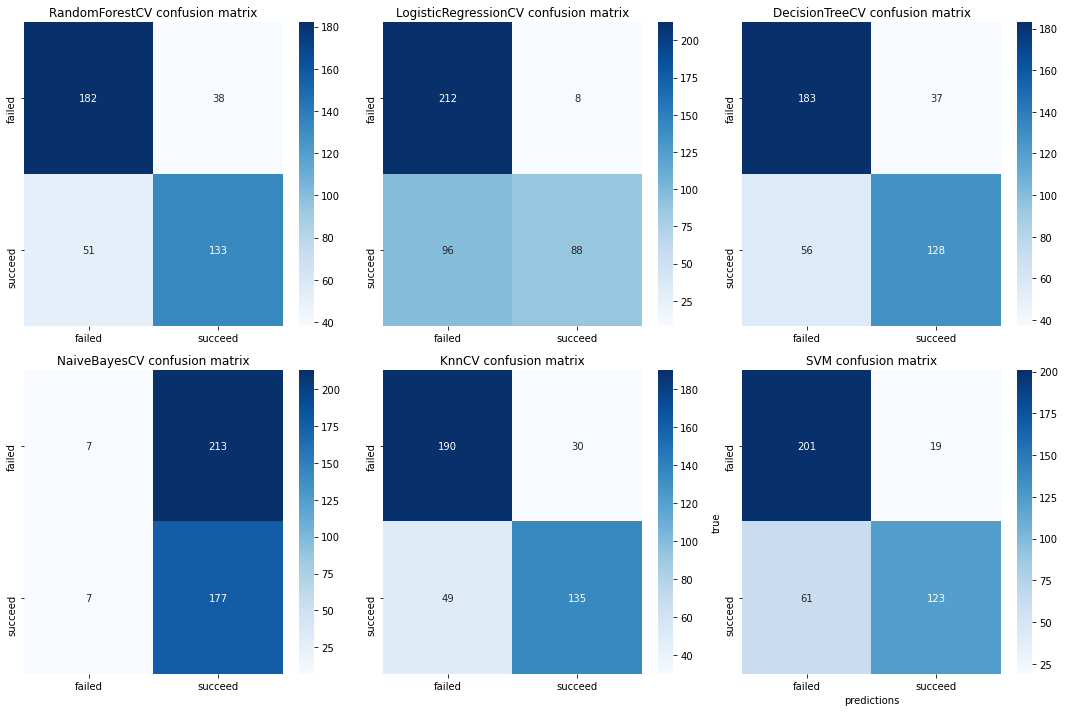

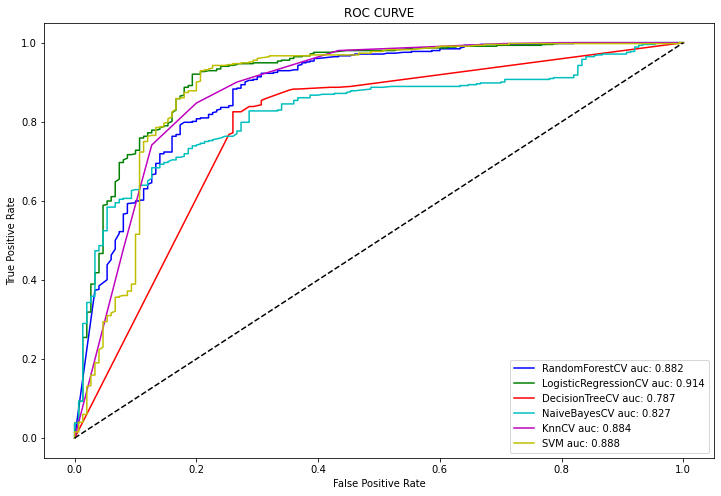

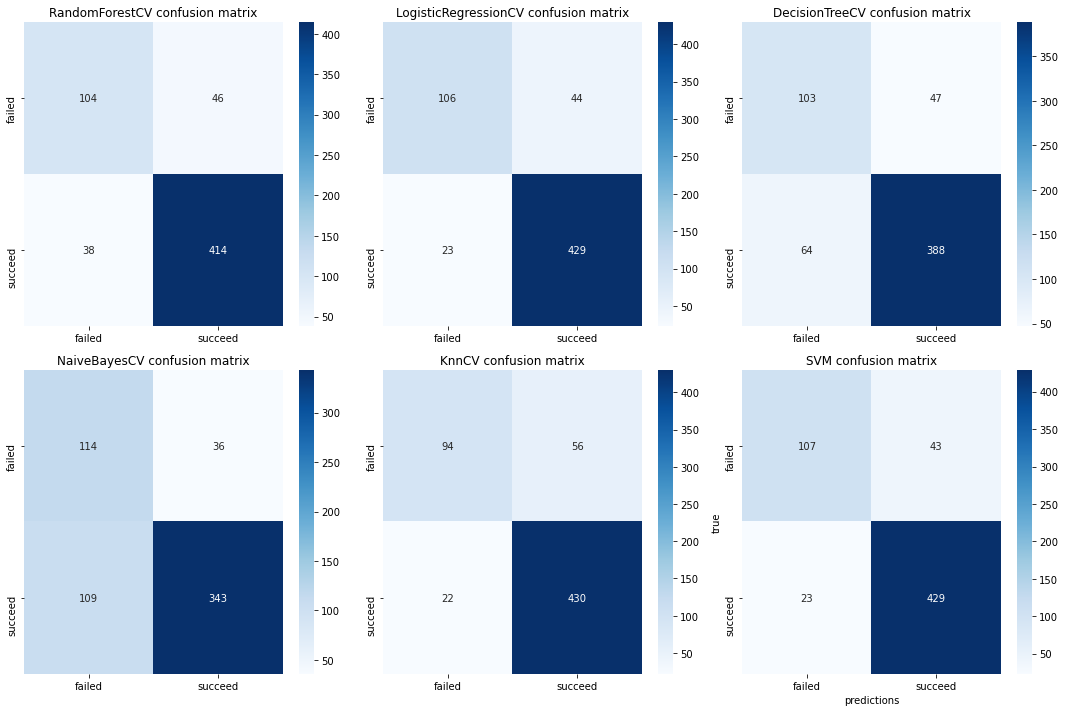

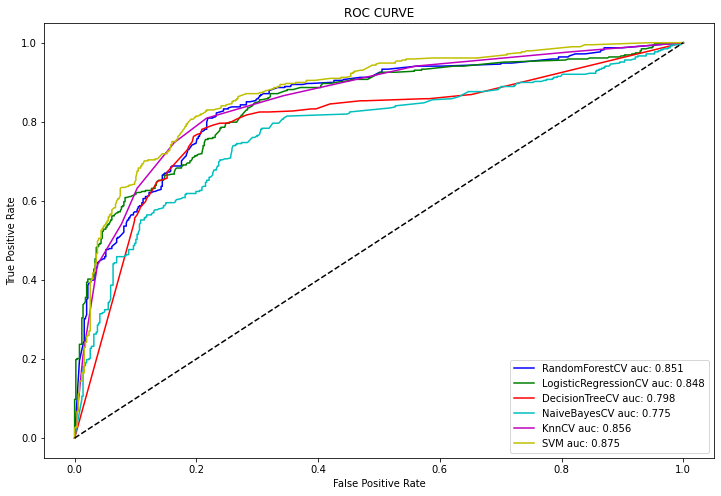

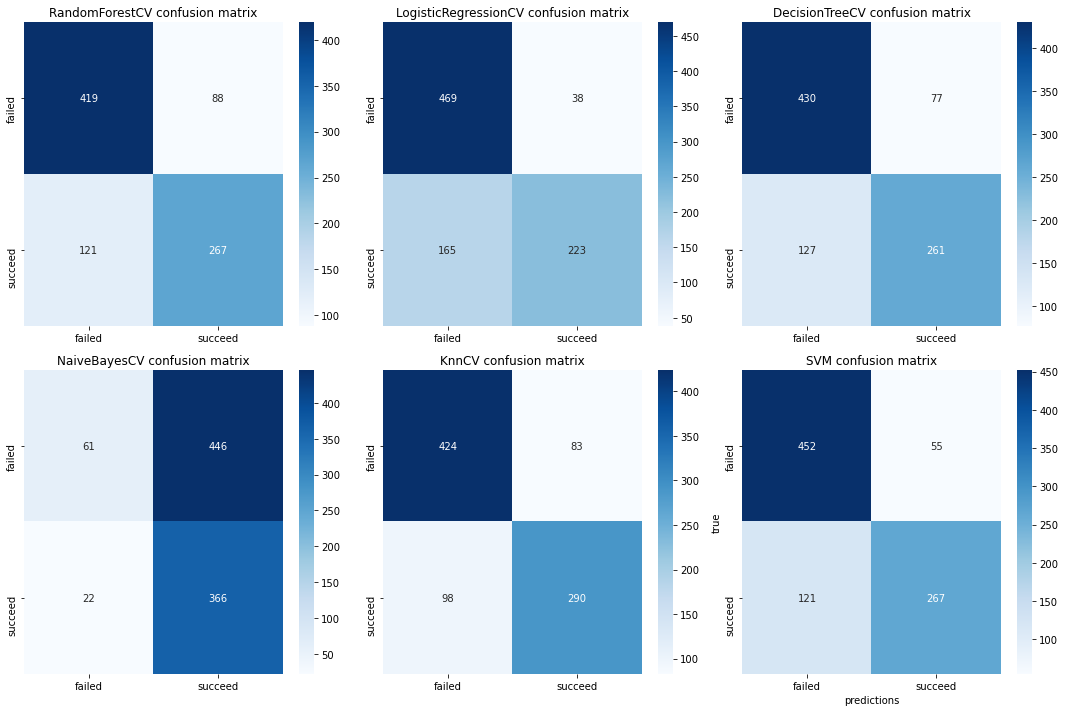

In [162]:
for cat in category_dict.keys():    
    print(cat)
    print(category_dict[cat]['scores'])
    RocCurvePlot(category_dict[cat]['scores']['Name'], category_dict[cat]['roc_data']['fpr'],
                                            category_dict[cat]['roc_data']['tpr'],category_dict[cat]['scores']['auc'])  
    plot_confusion_matrixes(category_dict[cat]['scores']['Name'], category_dict[cat]['confusion_matrixes'])

We can see that for some of the categories like: music, comics and theater the scores get even better.